# Digital For Industrial Summative - Part 1
 
## Creating A Digital Thread


A Digital Thread is the one unifying theme or characteristic that connects every aspect of an asset or unit, right from its inception and design, to manufacture, deployment, operations, maintenance to eventual retirement.

In analysis, a digital thread is the logical with which we bind and merge the various data sources into one whole, so that it lends itself to quantitative approaches easily.

<img src = 'images/Digital_Thread.JPG' width=500>


A digital thread is a technique to 'stitch' the data that comes in disjoint tables, such that they can be put together logically. That is a task for this exercise.

Data sets provided:

We have been give 5 data sets, all of which related to one month's worth of readings taken at a live volcano site. The volcano was instrumented with multiple sensors in 10 different geographical points (nodes). Our goal is to combine and merge all of this into one digital thread, making it amenable for analysis.

Tasks:

    1.0 Read all the needed input files
    2.0 Plotting Sensor Time Series
    3.0 Descriptive Analysis One data frame at a time 
    4.0 Creating a Digital Thread from the data sets
    5.0 Time Series based analysis
    6.0 Correlations Analysis
    7.0 Data Manipulations to Merge multiple data sets
    8.0 Building A Battery Remaining-Life prediction model

In [104]:

import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime
import os
import warnings

# For plot
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.rc("font", size=14)    #change font size on a matplotlib plot
sns.set(style="white")  #seaborn styling
sns.set(style="darkgrid", color_codes=True)

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 6
%matplotlib inline

### 1.0 Read all the needed input files

Create multiple data frames, one to hold each data table.

Convert all Data frame time stamps into date-time format, so that time-based indexing is possible

In [105]:
# Import all csv data
datatypes = pd.read_csv('datatypes.csv')
nodes = pd.read_csv('nodes.csv')
sensors = pd.read_csv('sensors.csv')
volcanos = pd.read_csv('volcanos.csv')
datapoints = pd.read_csv('datapoints.csv')

In [106]:
## Exploratory Data Ananlysis

In [107]:
datatypes.head()

id                            type  \
0  35dcb3c0-8679-11e6-bda3-ef77801087ee                     temperature   
1  35dcb3c1-8679-11e6-bda3-ef77801087ee                        pressure   
2  35dcb3c2-8679-11e6-bda3-ef77801087ee                        humidity   
3  35dcdad0-8679-11e6-bda3-ef77801087ee    carbon dioxide concentration   
4  35dcdad1-8679-11e6-bda3-ef77801087ee  hydrogen sulfide concentration   

             si_unit type_id  
0            celcius     TCA  
1             pascal      PA  
2  relative humidity    HUMA  
3                ppm  GP_CO2  
4                ppm  GP_H2S

In [108]:
nodes.head()

id name description location   status  \
0  c5e39fa0-867a-11e6-a353-2f6c041e2491   N1          \N       \N  OFFLINE   
1  c147ece0-8679-11e6-a353-2f6c041e2491   N9          \N       \N  OFFLINE   
2  76309900-8679-11e6-a353-2f6c041e2491   N8          \N       \N  OFFLINE   
3  762b8ff0-8679-11e6-a353-2f6c041e2491  N10          \N       \N  OFFLINE   
4  c14ccee0-8679-11e6-a353-2f6c041e2491   N2          \N       \N  OFFLINE   

               created_at                  updated_at  \
0  2016-08-17 01:06:49+00  2016-09-29 19:28:05.932+00   
1  2016-08-07 00:51:40+00  2016-09-29 19:41:07.065+00   
2  2016-08-03 22:09:40+00  2016-09-29 19:20:17.417+00   
3  2016-08-03 04:39:25+00  2016-09-29 19:20:17.431+00   
4  2016-08-10 04:20:22+00  2016-09-29 19:20:17.523+00   

                             volcano_id  
0  35dc3e90-8679-11e6-bda3-ef77801087ee  
1  35dc3e90-8679-11e6-bda3-ef77801087ee  
2  35dc3e90-8679-11e6-bda3-ef77801087ee  
3  35dc3e90-8679-11e6-bda3-ef77801087ee  
4  35dc3e90-8679-11e6-bda3-ef77801087ee

In [109]:
sensors.head()

id description  data_frequency   status  \
0  c15a6370-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
1  7635c920-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
2  763b9580-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
3  763ca6f0-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
4  763d9150-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   

               created_at                  updated_at  \
0  2016-08-07 00:51:40+00  2016-09-29 19:41:07.066+00   
1  2016-08-03 04:39:25+00  2016-09-29 20:13:52.793+00   
2  2016-08-03 04:39:25+00  2016-09-29 20:13:52.797+00   
3  2016-08-03 04:39:25+00  2016-09-29 20:13:52.803+00   
4  2016-08-03 04:39:25+00  2016-09-29 20:13:52.811+00   

                           data_type_id                               node_id  
0  35dcdad0-8679-11e6-bda3-ef77801087ee  c147ece0-8679-11e6-a353-2f6c041e2491  
1  35dcdad2-8679-11e6-bda3-ef77801087ee  762b8ff0-8679-11e6-a353-2f6c041e2491  
2  35dcdad1-8679-11e6-bda3-ef77801087ee  762b8ff0-8679-11e6-a353-2f6c041e2491  
3  35dcb3c0-8679-11e6-bda3-ef77801087ee  762b8ff0-8679-11e6-a353-2f6c041e2491  
4  35dcb3c1-8679-11e6-bda3-ef77801087ee  762b8ff0-8679-11e6-a353-2f6c041e2491

In [110]:
volcanos.head()

id    name  \
0  35dc3e90-8679-11e6-bda3-ef77801087ee  Masaya   

                                         description  \
0  This is the world's biggest, baddest, most evi...   

                                   location   status  \
0  {11.985318299999999,-86.178342900000004}  OFFLINE   

                   created_at                  updated_at  
0  2016-09-29 19:16:23.419+00  2016-10-07 07:43:05.015+00

In [111]:
print(datatypes.shape,nodes.shape,sensors.shape,volcanos.shape, datapoints.shape)

(7, 4) (11, 8) (61, 8) (1, 7) (176534, 4)


#### The IDs are connected in a way, for example id column in *sensors* is the same as sensor_id in *datapoints*

In [112]:
datapoints.head()

id      value               timestamp  \
0  764c5e60-8679-11e6-a353-2f6c041e2491     98.000  2016-08-03 04:39:25+00   
1  764c5e61-8679-11e6-a353-2f6c041e2491     33.198  2016-08-03 04:39:25+00   
2  764dbdf0-8679-11e6-a353-2f6c041e2491     29.300  2016-08-03 04:39:25+00   
3  764dbdf1-8679-11e6-a353-2f6c041e2491  96893.110  2016-08-03 04:39:25+00   
4  764dbdf2-8679-11e6-a353-2f6c041e2491    459.736  2016-08-03 04:39:25+00   

                              sensor_id  
0  7635c920-8679-11e6-a353-2f6c041e2491  
1  763b9580-8679-11e6-a353-2f6c041e2491  
2  763ca6f0-8679-11e6-a353-2f6c041e2491  
3  763d9150-8679-11e6-a353-2f6c041e2491  
4  763701a1-8679-11e6-a353-2f6c041e2491

In [113]:
# Convert timestamp to datetime
datapoints['timestamp']= pd.to_datetime(datapoints['timestamp'])


In [114]:
datapoints['sensor_id'].nunique() # Shows 61 unique sensors

61

### 2. Plotting Sensor Time Series

Create separate plots for each sensor in the dataset. Store each one in a separate file.

**What (if anything) can we tell about the various sensors from the plots?**

1. The sensors measured different characteristics.
2. Some sensors have missing values...probably dead.
3. The maximum value obtained from each sensor was plotted.
4. Some days have no sensor data acquired
5. Sensor 48 has complete daily data


In [115]:
# Split the timestamp
datapoints['Day'] = datapoints['timestamp'].dt.day 
datapoints['Month'] = datapoints['timestamp'].dt.month
datapoints['Year'] = datapoints['timestamp'].dt.year
datapoints['Time'] = datapoints['timestamp'].dt.time
plots = datapoints.groupby('sensor_id')#.agg(lambda x: list(x))

In [116]:
#sensor_group = merged_data.groupby(['sensor_id','Day'])
# Group sensor data by month
# sensor_group= merged_data.groupby(['Month'])
# sensor_group.first()

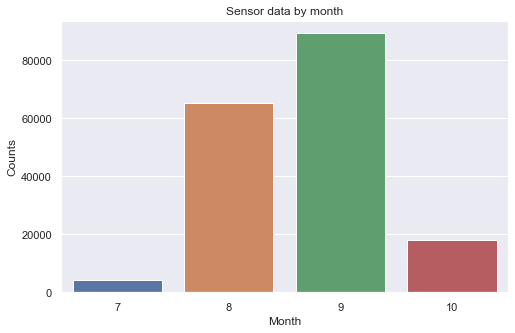

In [117]:
# Plot sensor data by month. Sensor data acquisition spreads from July to October. 
plt.figure(figsize=(8,5))
sns.countplot(datapoints['Month'])
plt.title('Sensor data by month')
plt.ylabel('Counts')
plt.xlabel('Month');

In [118]:
plots.head()

id      value  \
0       764c5e60-8679-11e6-a353-2f6c041e2491     98.000   
1       764c5e61-8679-11e6-a353-2f6c041e2491     33.198   
2       764dbdf0-8679-11e6-a353-2f6c041e2491     29.300   
3       764dbdf1-8679-11e6-a353-2f6c041e2491  96893.110   
4       764dbdf2-8679-11e6-a353-2f6c041e2491    459.736   
...                                      ...        ...   
167718  12ac7c20-e707-11e6-89c8-314aa4f67f8c    455.000   
167719  12aec610-e707-11e6-89c8-314aa4f67f8c    213.000   
167720  12afd780-e707-11e6-89c8-314aa4f67f8c    429.000   
167721  12b15e20-e707-11e6-89c8-314aa4f67f8c    225.000   
167722  12b22170-e707-11e6-89c8-314aa4f67f8c    321.000   

                       timestamp                             sensor_id  Day  \
0      2016-08-03 04:39:25+00:00  7635c920-8679-11e6-a353-2f6c041e2491    3   
1      2016-08-03 04:39:25+00:00  763b9580-8679-11e6-a353-2f6c041e2491    3   
2      2016-08-03 04:39:25+00:00  763ca6f0-8679-11e6-a353-2f6c041e2491    3   
3      2016-08-03 04:39:25+00:00  763d9150-8679-11e6-a353-2f6c041e2491    3   
4      2016-08-03 04:39:25+00:00  763701a1-8679-11e6-a353-2f6c041e2491    3   
...                          ...                                   ...  ...   
167718 2016-07-01 00:00:31+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c    1   
167719 2016-07-01 00:10:02+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c    1   
167720 2016-07-01 00:40:00+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c    1   
167721 2016-07-01 00:20:00+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c    1   
167722 2016-07-01 00:30:01+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c    1   

        Month  Year      Time  
0           8  2016  04:39:25  
1           8  2016  04:39:25  
2           8  2016  04:39:25  
3           8  2016  04:39:25  
4           8  2016  04:39:25  
...       ...   ...       ...  
167718      7  2016  00:00:31  
167719      7  2016  00:10:02  
167720      7  2016  00:40:00  
167721      7  2016  00:20:00  
167722      7  2016  00:30:01  

[305 rows x 8 columns]

In [119]:
# Create a function for the plots
def getgroup(sensor_id):
    get = plots.get_group(sensor_id)
    sensorIndex = get.set_index('timestamp', inplace=True)
    return get

def groupget(sensorname,monthno):
    regroup = sensorname.groupby('Month')
    groupno = regroup.get_group(monthno)
    groupfinal = groupno.groupby(["Day"], as_index=False)["value"].max()
    return groupfinal

def custom_plot(x,y, ax=None, **plt_kwargs):
    if ax is None:
        ax = plt.gca()
    ax.set_ylabel('Value')
    ax.set_xlabel('Day')
    ax.plot(x,y, **plt_kwargs) 
    return(ax)

### Plotting each sensors per month

Text(0.5, 1.0, 'Maximum Daily Values for c15a6370 Sensor in August')

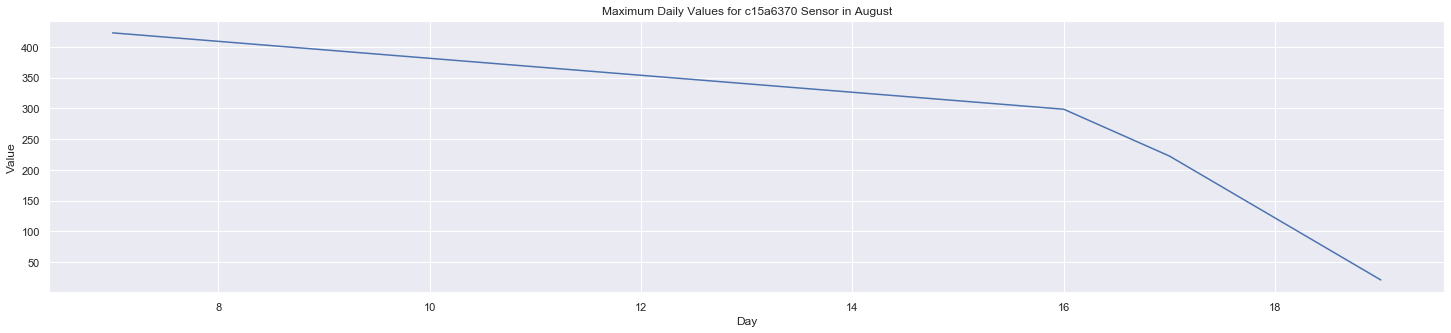

In [120]:
# Sensor 1 plot -  Data only available in August
sensor1 = getgroup('c15a6370-8679-11e6-a353-2f6c041e2491')
sensor1aug = groupget(sensor1,8)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor1aug.Day, y=sensor1aug.value)
plt.title('Maximum Daily Values for c15a6370 Sensor in August')


Text(0.5, 1.0, 'Maximum Daily Values for 7635c920 Sensor in September')

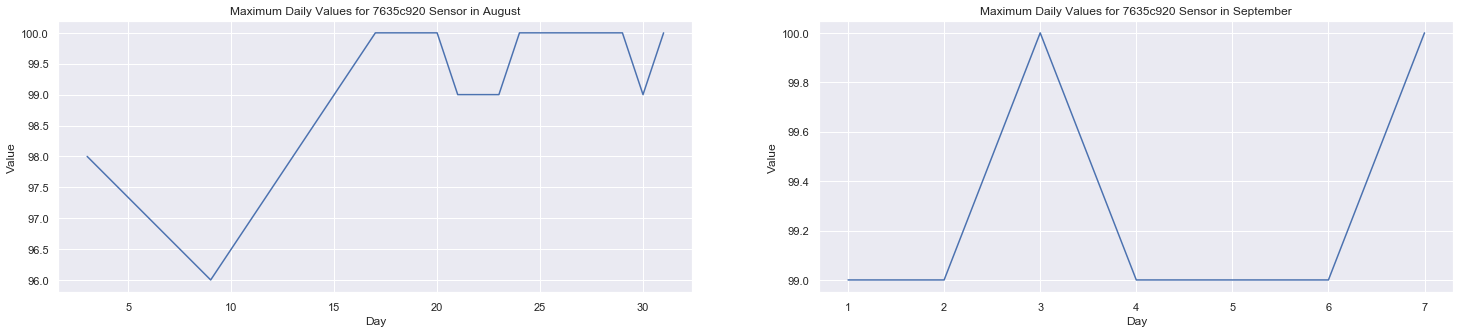

In [121]:
# Sensor 2 plot -  Data only available in August and September
sensor2 = getgroup('7635c920-8679-11e6-a353-2f6c041e2491')
sensor2aug = groupget(sensor2,8)
sensor2sep = groupget(sensor2,9)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor2aug.Day, y=sensor2aug.value)
plt.title('Maximum Daily Values for 7635c920 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor2sep.Day, y=sensor2sep.value)
plt.title('Maximum Daily Values for 7635c920 Sensor in September')


Text(0.5, 1.0, 'Maximum Daily Values for 763b9580 Sensor in September')

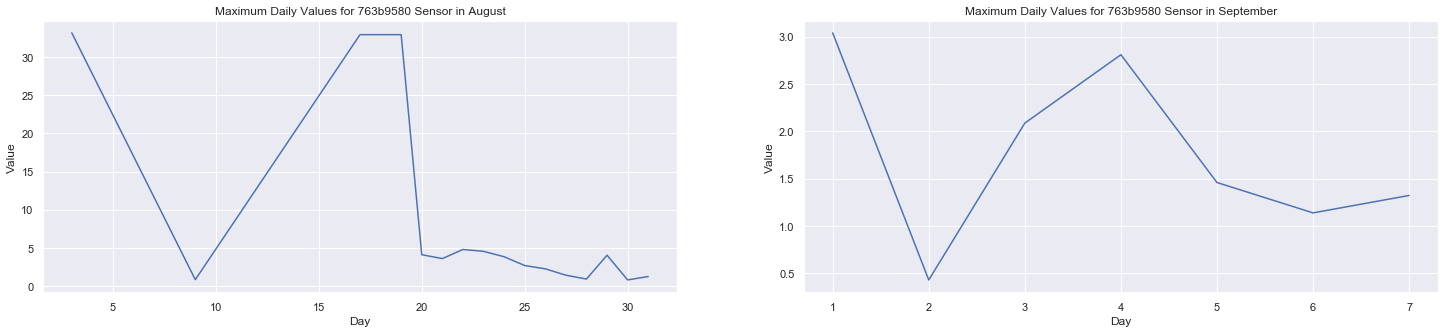

In [122]:
# Sensor 3 plot -  Data only available in August and September
sensor3 = getgroup('763b9580-8679-11e6-a353-2f6c041e2491')
sensor3aug = groupget(sensor3,8)
sensor3sep = groupget(sensor3,9)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor3aug.Day, y=sensor3aug.value)
plt.title('Maximum Daily Values for 763b9580 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor3sep.Day, y=sensor3sep.value)
plt.title('Maximum Daily Values for 763b9580 Sensor in September')

Text(0.5, 1.0, 'Maximum Daily Values for 763ca6f0 Sensor in September')

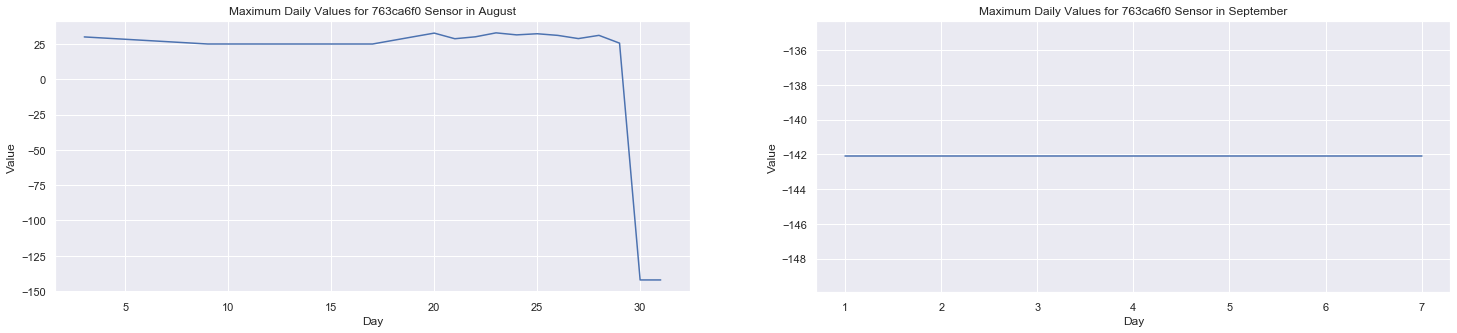

In [123]:
# Sensor 4 plot -  Data only available in August and September
sensor4 = getgroup('763ca6f0-8679-11e6-a353-2f6c041e2491')
sensor4aug = groupget(sensor4,8)
sensor4sep = groupget(sensor4,9)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor4aug.Day, y=sensor4aug.value)
plt.title('Maximum Daily Values for 763ca6f0 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor4sep.Day, y=sensor4sep.value)
plt.title('Maximum Daily Values for 763ca6f0 Sensor in September')

Text(0.5, 1.0, 'Maximum Daily Values for 763d9150 Sensor in September')

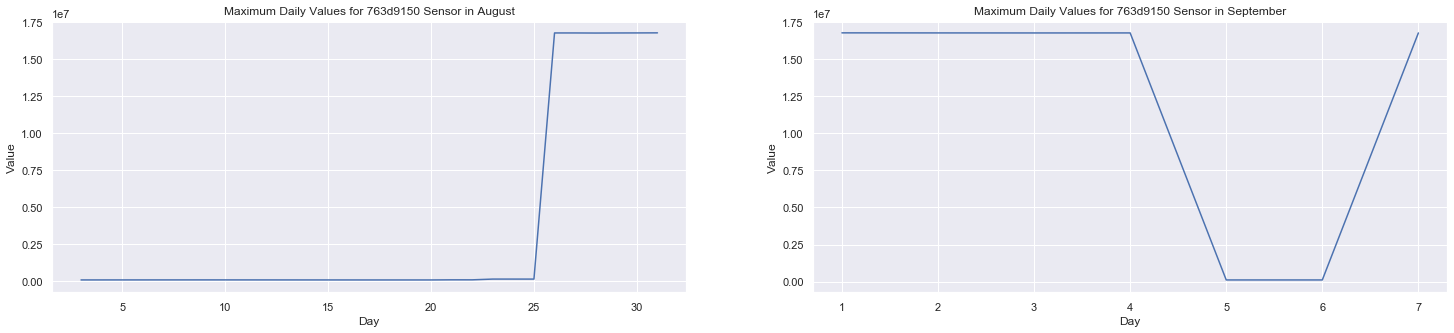

In [124]:
# Sensor 5 plot -  Data only available in August and September
sensor5 = getgroup('763d9150-8679-11e6-a353-2f6c041e2491')
sensor5aug = groupget(sensor5,8)
sensor5sep = groupget(sensor5,9)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor5aug.Day, y=sensor5aug.value)
plt.title('Maximum Daily Values for 763d9150 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor5sep.Day, y=sensor5sep.value)
plt.title('Maximum Daily Values for 763d9150 Sensor in September')

Text(0.5, 1.0, 'Maximum Daily Values for 7636da90 Sensor in October')

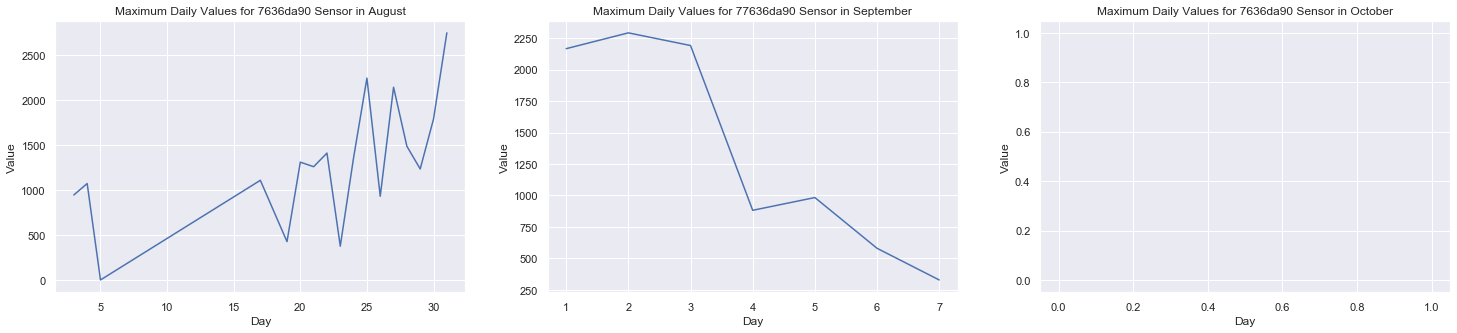

In [125]:
# Sensor 6 plot -  Data only available in August and September. October data is null
sensor6 = getgroup('7636da90-8679-11e6-a353-2f6c041e2491')
sensor6aug = groupget(sensor6,8)
sensor6sep = groupget(sensor6,9)
sensor6oct = groupget(sensor6,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor6aug.Day, y=sensor6aug.value)
plt.title('Maximum Daily Values for 7636da90 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor6sep.Day, y=sensor6sep.value)
plt.title('Maximum Daily Values for 77636da90 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor6oct.Day, y=sensor6oct.value)
plt.title('Maximum Daily Values for 7636da90 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for 76413ad0 Sensor in September')

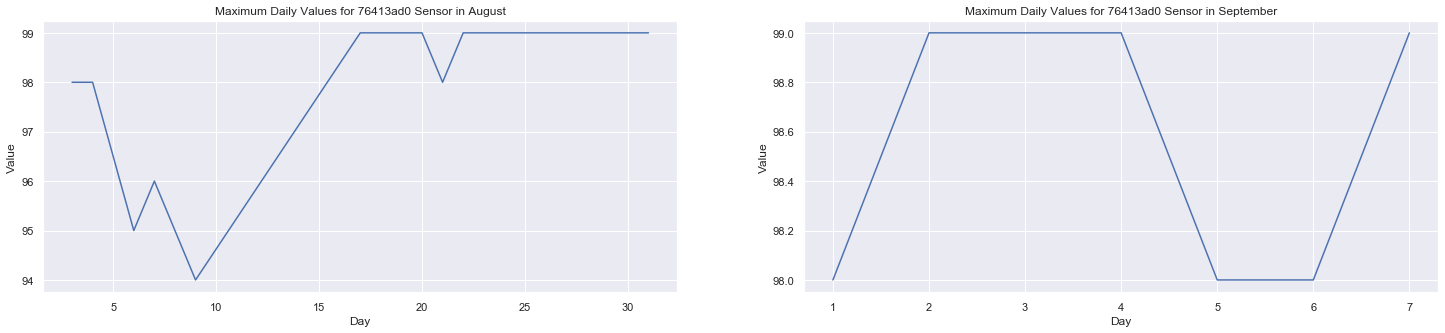

In [126]:
# Sensor 7 plot -  Data only available in August and September
sensor7 = getgroup('76413ad0-8679-11e6-a353-2f6c041e2491')
sensor7aug = groupget(sensor7,8)
sensor7sep = groupget(sensor7,9)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor7aug.Day, y=sensor7aug.value)
plt.title('Maximum Daily Values for 76413ad0 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor7sep.Day, y=sensor7sep.value)
plt.title('Maximum Daily Values for 76413ad0 Sensor in September')

Text(0.5, 1.0, 'Maximum Daily Values for 764161e0 Sensor in September')

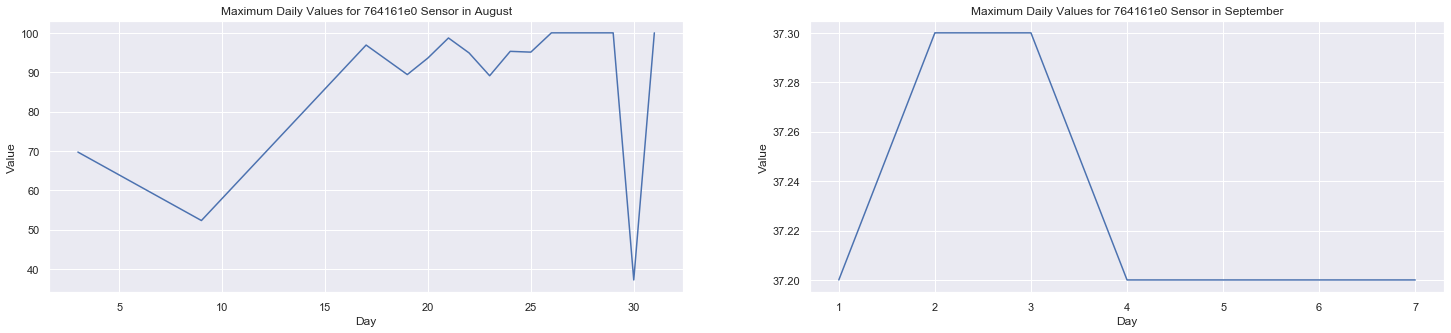

In [127]:
# Sensor 8 plot -  Data only available in August and September
sensor8 = getgroup('764161e0-8679-11e6-a353-2f6c041e2491')
sensor8aug = groupget(sensor8,8)
sensor8sep = groupget(sensor8,9)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor8aug.Day, y=sensor8aug.value)
plt.title('Maximum Daily Values for 764161e0 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor8sep.Day, y=sensor8sep.value)
plt.title('Maximum Daily Values for 764161e0 Sensor in September')


Text(0.5, 1.0, 'Maximum Daily Values for c5e685d0 Sensor in August')

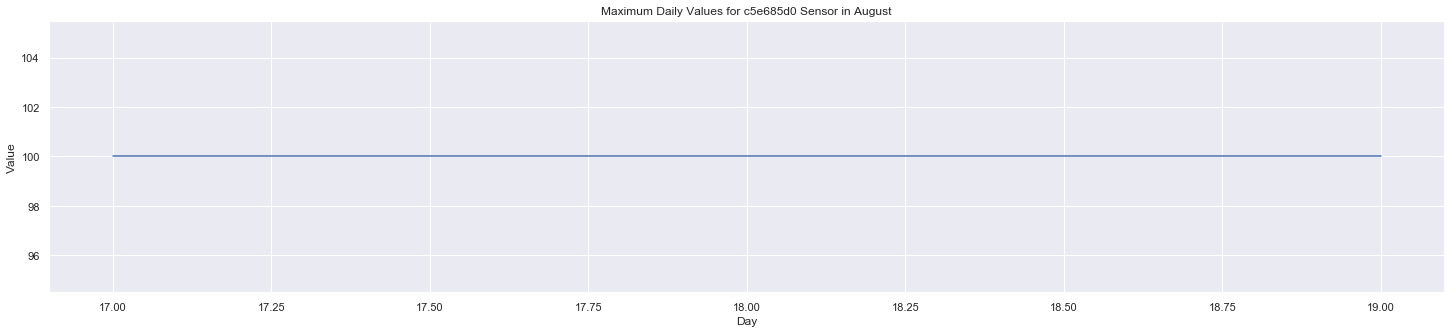

In [128]:
# Sensor 9 plot -  Data only available in August
sensor9 = getgroup('c5e685d0-867a-11e6-a353-2f6c041e2491')
sensor9aug = groupget(sensor9,8)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor9aug.Day, y=sensor9aug.value)
plt.title('Maximum Daily Values for c5e685d0 Sensor in August')


Text(0.5, 1.0, 'Maximum Daily Values for c5e9ba20 Sensor in August')

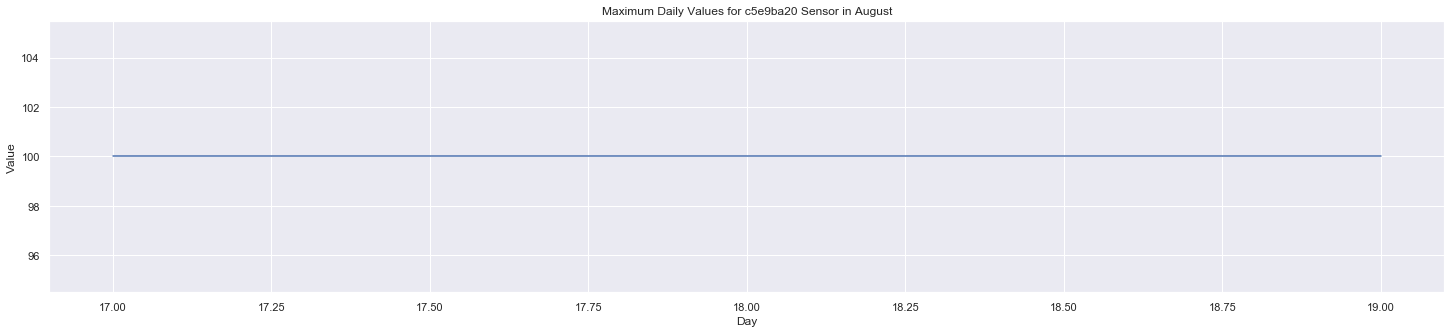

In [129]:
# Sensor 10 plot -  Data only available in August
sensor10 = getgroup('c5e9ba20-867a-11e6-a353-2f6c041e2491')
sensor10aug = groupget(sensor10,8)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor10aug.Day, y=sensor10aug.value)
plt.title('Maximum Daily Values for c5e9ba20 Sensor in August')

Text(0.5, 1.0, 'Maximum Daily Values for c159c730 Sensor in August')

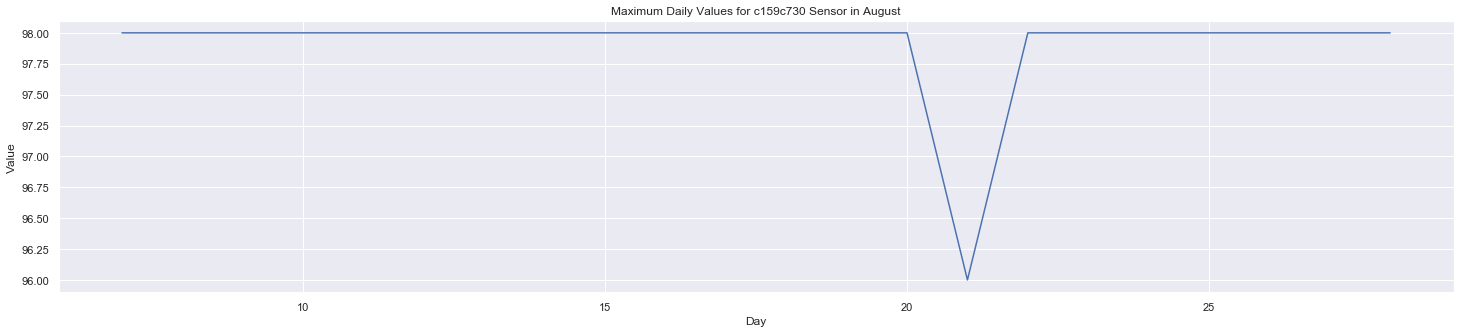

In [130]:
# Sensor 11 plot -  Data only available in August 
sensor11 = getgroup('c159c730-8679-11e6-a353-2f6c041e2491')
sensor11aug = groupget(sensor11,8)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor11aug.Day, y=sensor11aug.value)
plt.title('Maximum Daily Values for c159c730 Sensor in August')

Text(0.5, 1.0, 'Maximum Daily Values for c159ee40 Sensor in August')

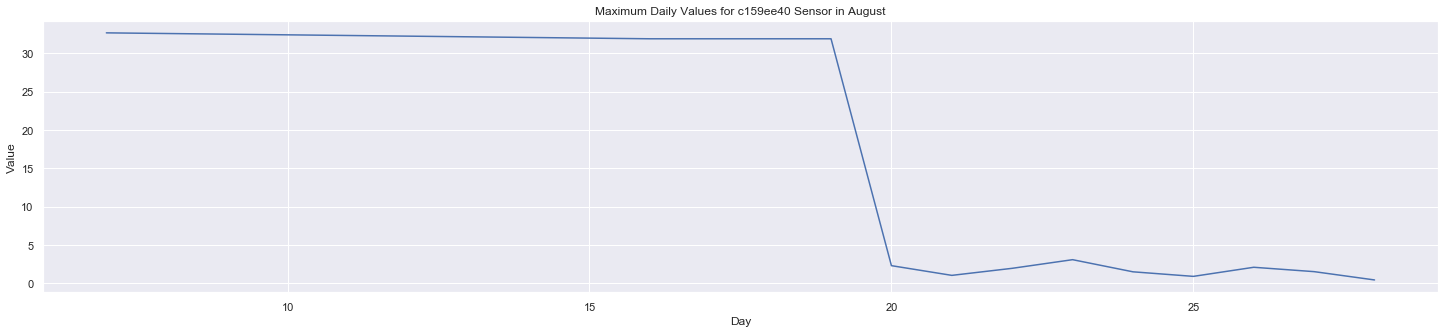

In [131]:
# Sensor 12 plot -  Data only available in August
sensor12 = getgroup('c159ee40-8679-11e6-a353-2f6c041e2491')
sensor12aug = groupget(sensor12,8)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor12aug.Day, y=sensor12aug.value)
plt.title('Maximum Daily Values for c159ee40 Sensor in August')

Text(0.5, 1.0, 'Maximum Daily Values for c15a6371 Sensor in August')

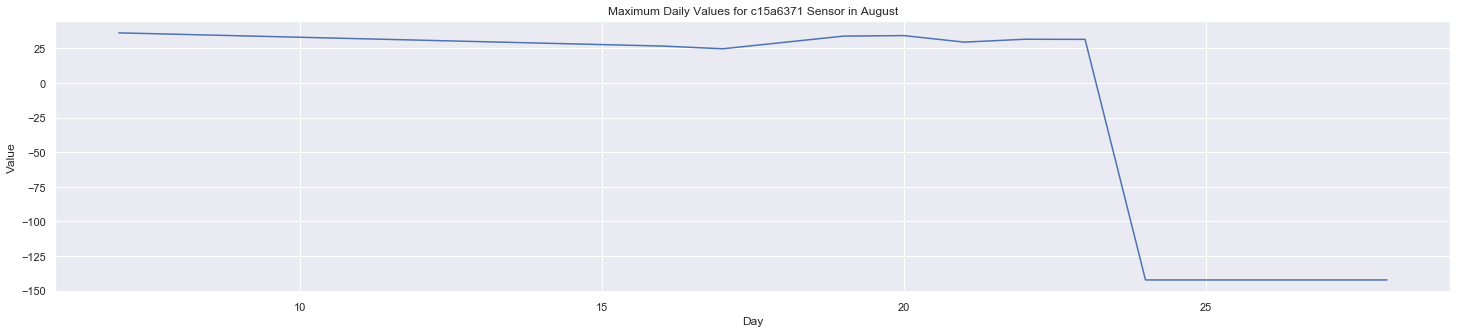

In [132]:
# Sensor 13 plot -  Data only available in August 
sensor13 = getgroup('c15a6371-8679-11e6-a353-2f6c041e2491')
sensor13aug = groupget(sensor13,8)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor13aug.Day, y=sensor13aug.value)
plt.title('Maximum Daily Values for c15a6371 Sensor in August')

Text(0.5, 1.0, 'Maximum Daily Values for c15a6372 Sensor in August')

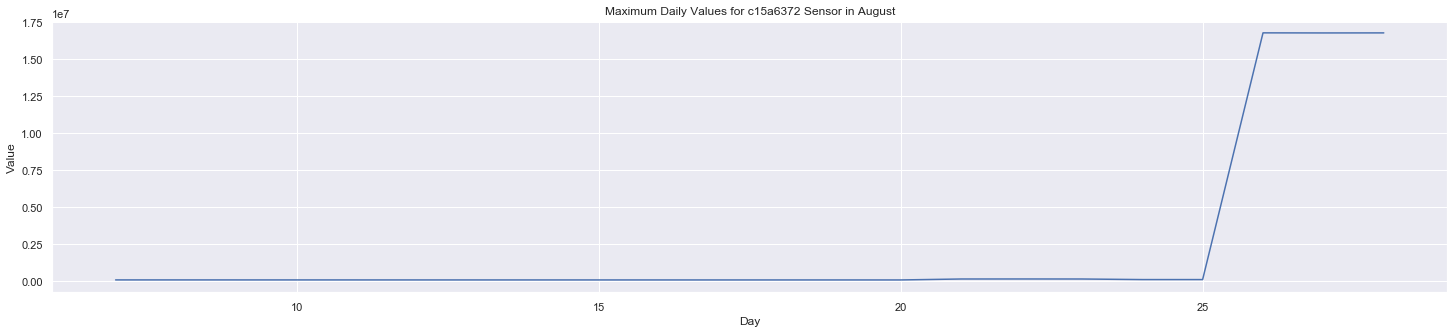

In [133]:
# Sensor 14 plot -  Data only available in August 
sensor14 = getgroup('c15a6372-8679-11e6-a353-2f6c041e2491')
sensor14aug = groupget(sensor14,8)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor14aug.Day, y=sensor14aug.value)
plt.title('Maximum Daily Values for c15a6372 Sensor in August')

Text(0.5, 1.0, 'Maximum Daily Values for c15c5f40 Sensor in August')

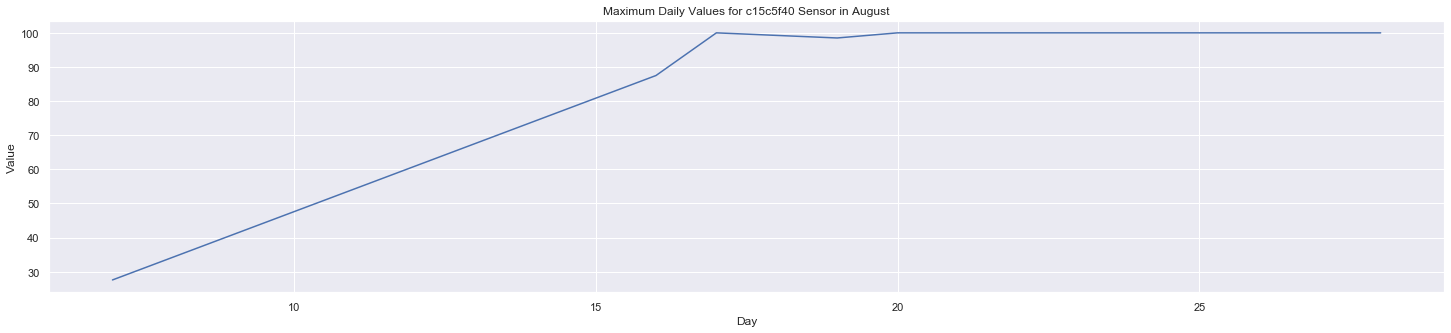

In [134]:
# Sensor 15 plot -  Data only available in August 
sensor15 = getgroup('c15c5f40-8679-11e6-a353-2f6c041e2491')
sensor15aug = groupget(sensor15,8)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor15aug.Day, y=sensor15aug.value)
plt.title('Maximum Daily Values for c15c5f40 Sensor in August')

Text(0.5, 1.0, 'Maximum Daily Values for c15ef750 Sensor in August')

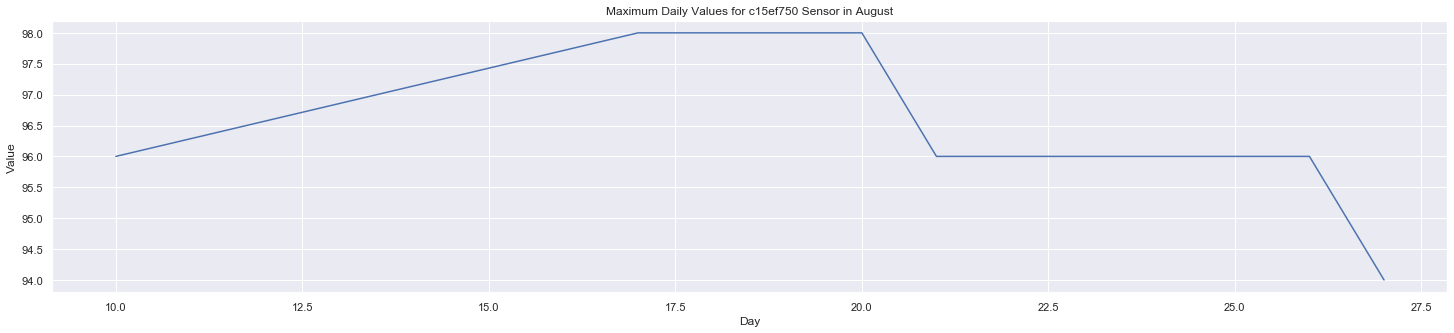

In [135]:
# Sensor 16 plot -  Data only available in August 
sensor16 = getgroup('c15ef750-8679-11e6-a353-2f6c041e2491')
sensor16aug = groupget(sensor16,8)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor16aug.Day, y=sensor16aug.value)
plt.title('Maximum Daily Values for c15ef750 Sensor in August')

Text(0.5, 1.0, 'Maximum Daily Values for 76427350 Sensor in September')

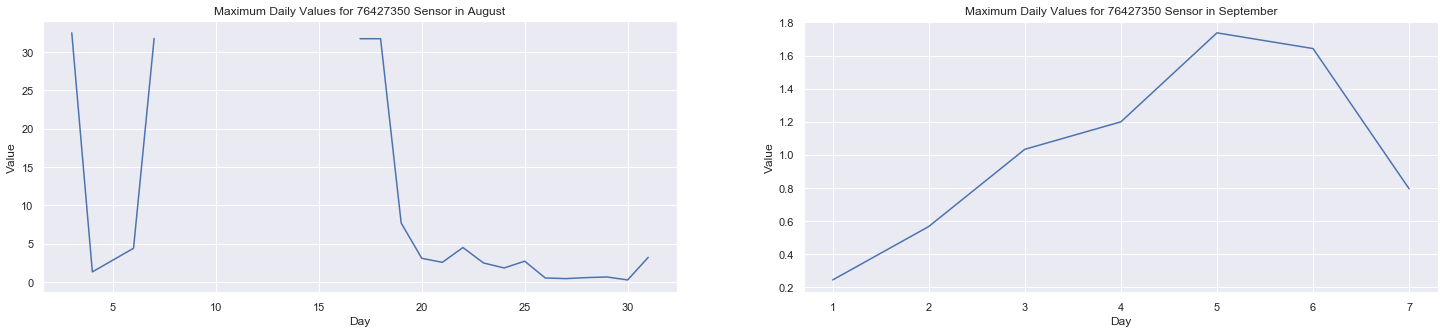

In [136]:
# Sensor 17 plot -  Data only available in August and September
sensor17 = getgroup('76427350-8679-11e6-a353-2f6c041e2491')
sensor17aug = groupget(sensor17,8)
sensor17sep = groupget(sensor17,9)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor17aug.Day, y=sensor17aug.value)
plt.title('Maximum Daily Values for 76427350 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor17sep.Day, y=sensor17sep.value)
plt.title('Maximum Daily Values for 76427350 Sensor in September')

Text(0.5, 1.0, 'Maximum Daily Values for 76427351 Sensor in September')

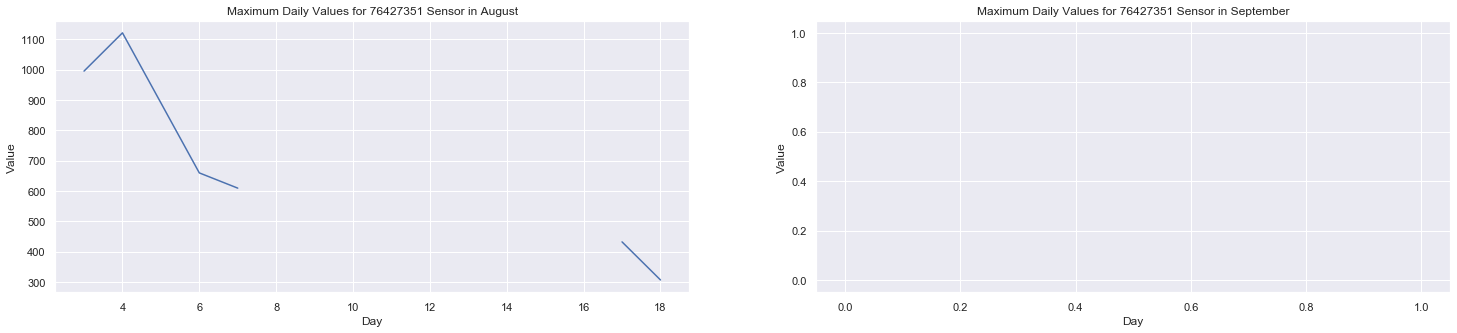

In [137]:
# Sensor 18 plot -  Data only available in August and September is empty
sensor18 = getgroup('76427351-8679-11e6-a353-2f6c041e2491')
sensor18aug = groupget(sensor18,8)
sensor18sep = groupget(sensor18,9)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor18aug.Day, y=sensor18aug.value)
plt.title('Maximum Daily Values for 76427351 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor18sep.Day, y=sensor18sep.value)
plt.title('Maximum Daily Values for 76427351 Sensor in September')

Text(0.5, 1.0, 'Maximum Daily Values for 76427351 Sensor in September')

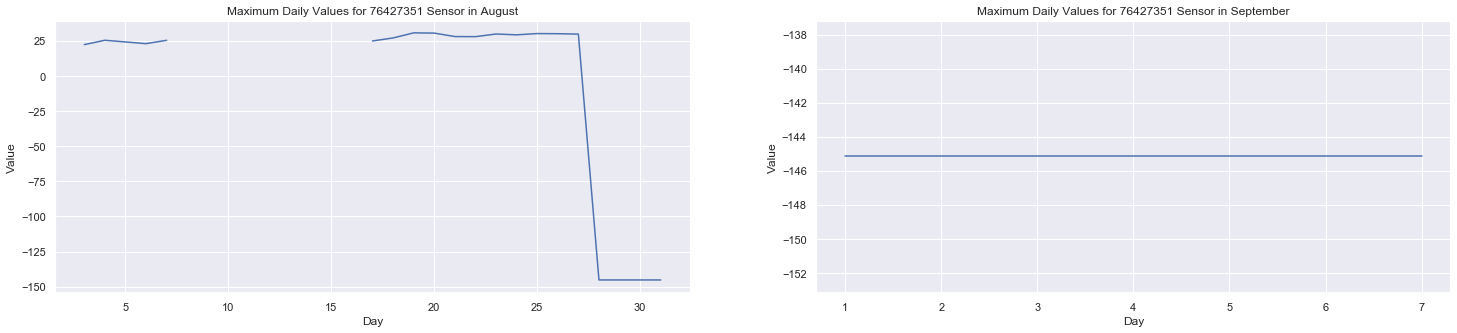

In [138]:
# Sensor 19 plot -  Data only available in August and September
sensor19 = getgroup('7644bd40-8679-11e6-a353-2f6c041e2491')
sensor19aug = groupget(sensor19,8)
sensor19sep = groupget(sensor19,9)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor19aug.Day, y=sensor19aug.value)
plt.title('Maximum Daily Values for 76427351 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor19sep.Day, y=sensor19sep.value)
plt.title('Maximum Daily Values for 76427351 Sensor in September')

Text(0.5, 1.0, 'Maximum Daily Values for 7645ceb0 Sensor in September')

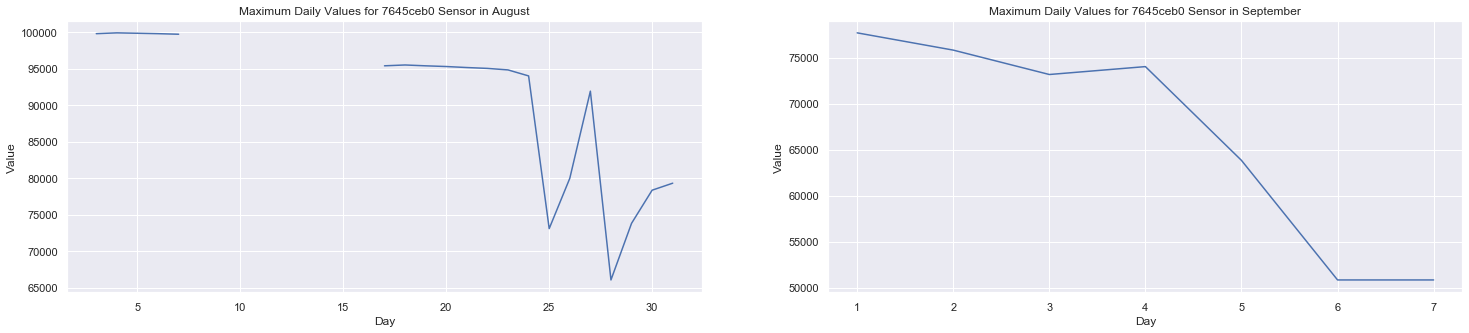

In [139]:
# Sensor 20 plot -  Data only available in August and September
sensor20 = getgroup('7645ceb0-8679-11e6-a353-2f6c041e2491')
sensor20aug = groupget(sensor20,8)
sensor20sep = groupget(sensor20,9)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor20aug.Day, y=sensor20aug.value)
plt.title('Maximum Daily Values for 7645ceb0 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor20sep.Day, y=sensor20sep.value)
plt.title('Maximum Daily Values for 7645ceb0 Sensor in September')

Text(0.5, 1.0, 'Maximum Daily Values for 7645ceb1 Sensor in September')

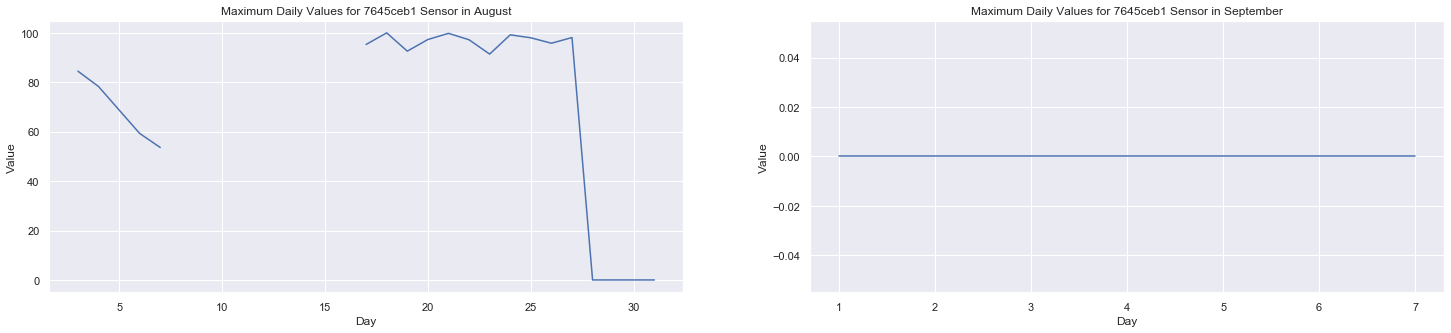

In [140]:
# Sensor 21 plot -  Data only available in August and September
sensor21 = getgroup('7645ceb1-8679-11e6-a353-2f6c041e2491')
sensor21aug = groupget(sensor21,8)
sensor21sep = groupget(sensor21,9)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor21aug.Day, y=sensor21aug.value)
plt.title('Maximum Daily Values for 7645ceb1 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor21sep.Day, y=sensor21sep.value)
plt.title('Maximum Daily Values for 7645ceb1 Sensor in September')

Text(0.5, 1.0, 'Maximum Daily Values for 763701a1 Sensor in September')

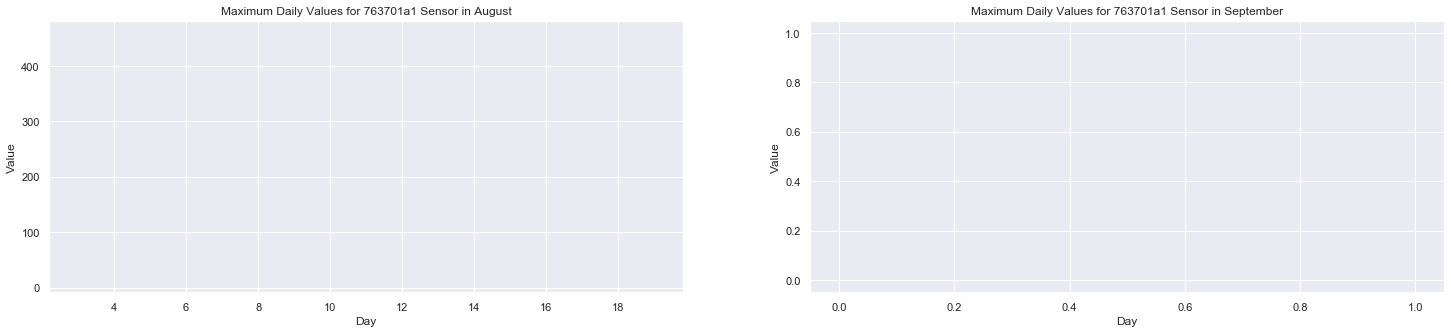

In [141]:
# Sensor 22 plot -  Empty data for this sensor
sensor22 = getgroup('763701a1-8679-11e6-a353-2f6c041e2491')
sensor22aug = groupget(sensor22,8)
sensor22sep = groupget(sensor22,9)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor22aug.Day, y=sensor22aug.value)
plt.title('Maximum Daily Values for 763701a1 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor22sep.Day, y=sensor22sep.value)
plt.title('Maximum Daily Values for 763701a1 Sensor in September')

Text(0.5, 1.0, 'Maximum Daily Values for c15f9391 Sensor in August')

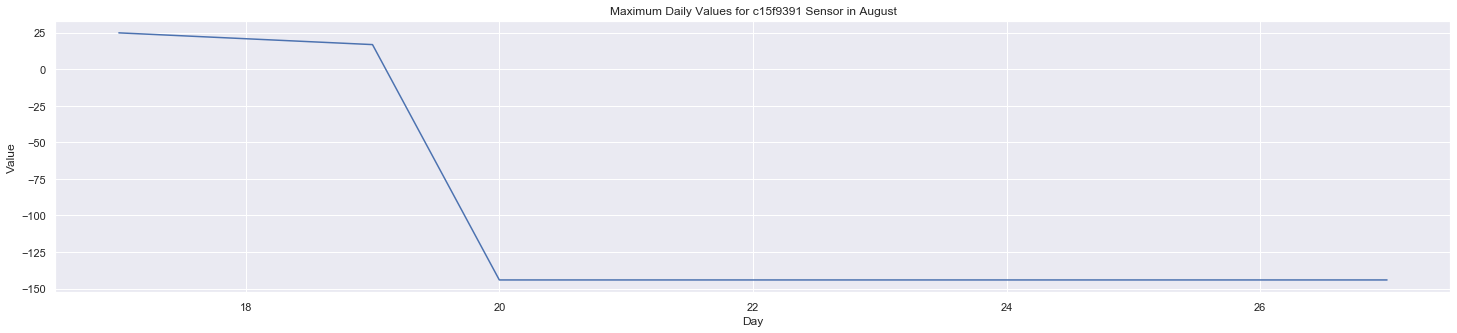

In [142]:
# Sensor 23 plot -  Data only available in August 
sensor23 = getgroup('c15f9391-8679-11e6-a353-2f6c041e2491')
sensor23aug = groupget(sensor23,8)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor23aug.Day, y=sensor23aug.value)
plt.title('Maximum Daily Values for c15f9391 Sensor in August')


Text(0.5, 1.0, 'Maximum Daily Values for c162c7e0 Sensor in August')

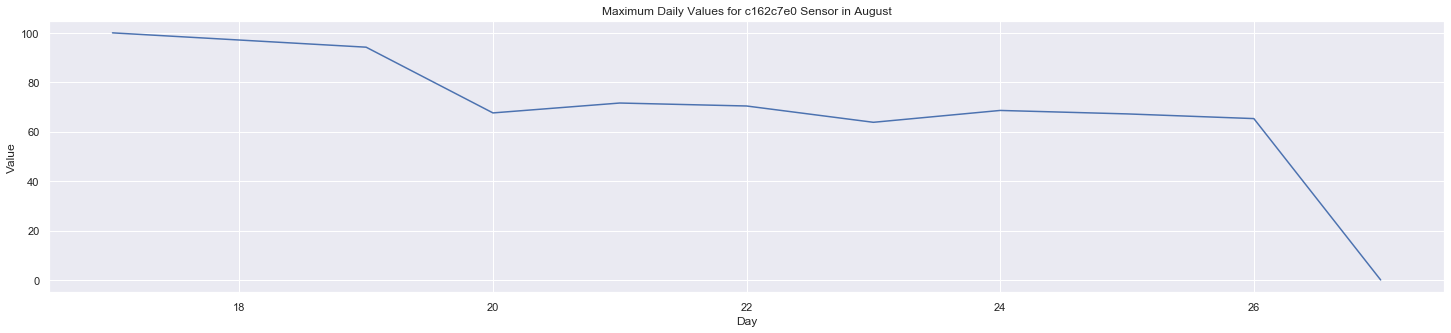

In [143]:
# Sensor 24 plot -  Data only available in August
sensor24 = getgroup('c162c7e0-8679-11e6-a353-2f6c041e2491')
sensor24aug = groupget(sensor24,8)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor24aug.Day, y=sensor24aug.value)
plt.title('Maximum Daily Values for c162c7e0 Sensor in August')

Text(0.5, 1.0, 'Maximum Daily Values for c15f9390 Sensor in August')

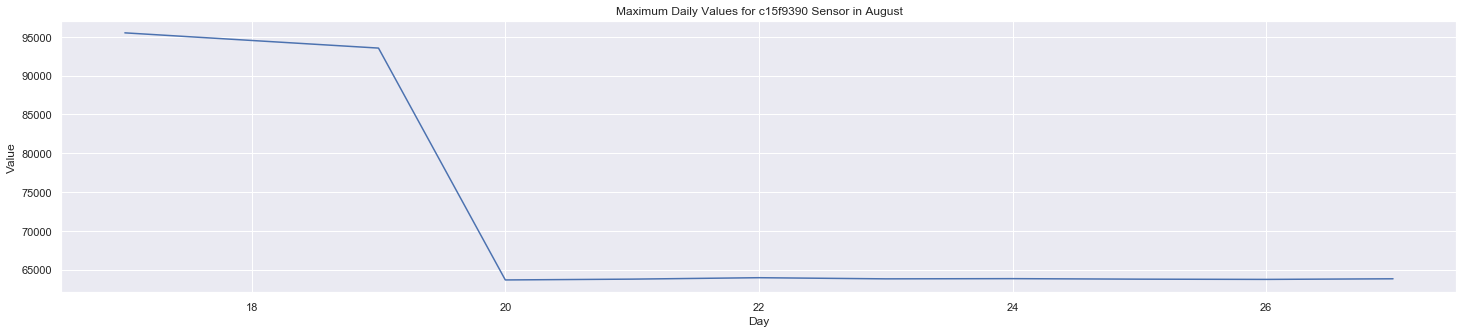

In [144]:
# Sensor 2 plot -  Data only available in August
sensor25 = getgroup('c15f9390-8679-11e6-a353-2f6c041e2491')
sensor25aug = groupget(sensor25,8)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor25aug.Day, y=sensor25aug.value)
plt.title('Maximum Daily Values for c15f9390 Sensor in August')

Text(0.5, 1.0, 'Maximum Daily Values for c15fbaa0 Sensor in August')

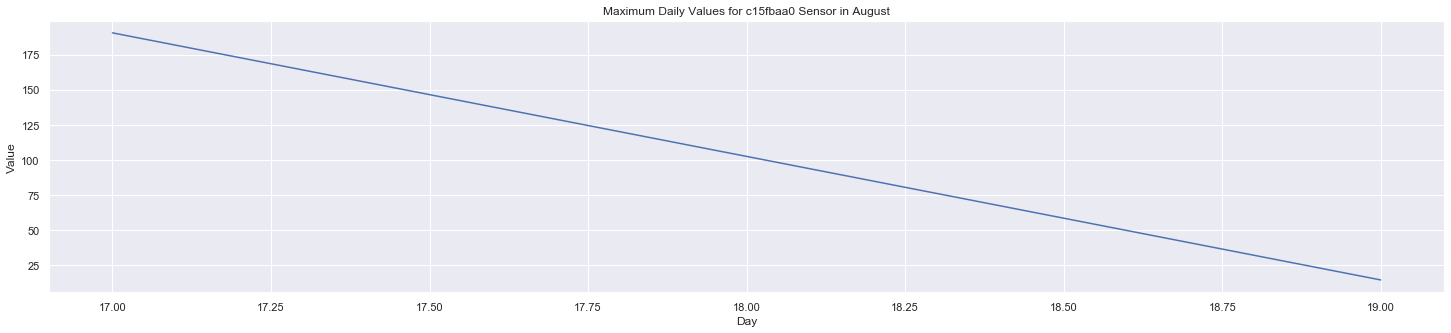

In [145]:
# Sensor 26 plot -  Data only available in August
sensor26 = getgroup('c15fbaa0-8679-11e6-a353-2f6c041e2491')
sensor26aug = groupget(sensor26,8)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor26aug.Day, y=sensor26aug.value)
plt.title('Maximum Daily Values for c15fbaa0 Sensor in August')


Text(0.5, 1.0, 'Maximum Daily Values for c15fbaa1 Sensor in August')

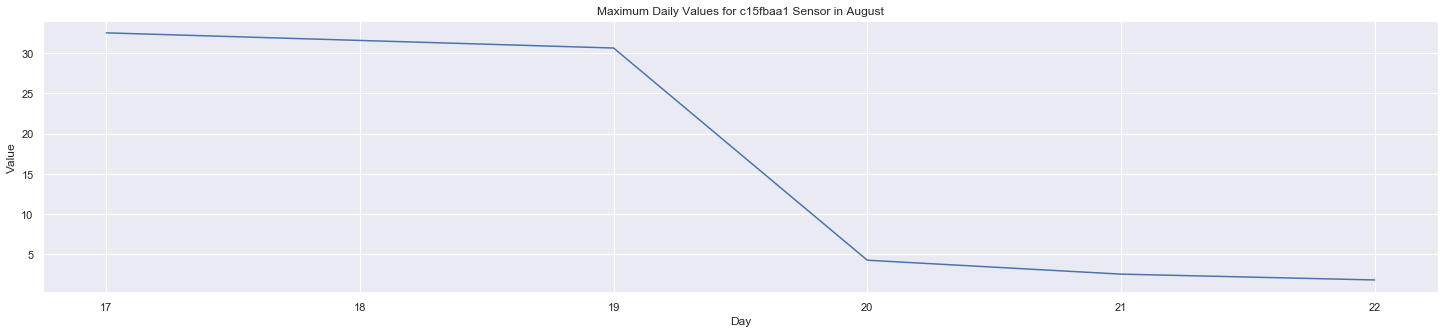

In [146]:
# Sensor 27 plot -  Data only available in August
sensor27 = getgroup('c15fbaa1-8679-11e6-a353-2f6c041e2491')
sensor27aug = groupget(sensor27,8)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor27aug.Day, y=sensor27aug.value)
plt.title('Maximum Daily Values for c15fbaa1 Sensor in August')

Text(0.5, 1.0, 'Maximum Daily Values for 763701a0 Sensor in October')

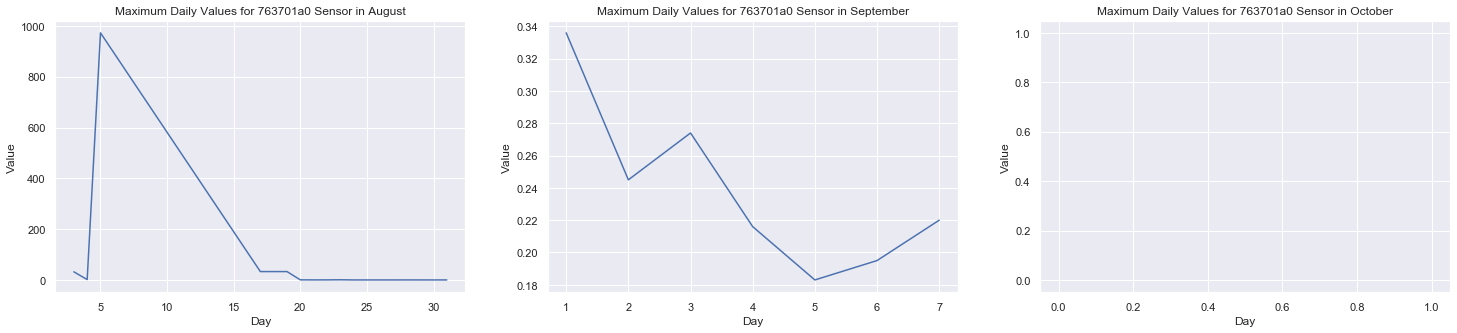

In [147]:
# Sensor 28 plot -  Data only available in August and September, empty data in october
sensor28 = getgroup('763701a0-8679-11e6-a353-2f6c041e2491')
sensor28aug = groupget(sensor28,8)
sensor28sep = groupget(sensor28,9)
sensor28oct = groupget(sensor28,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor28aug.Day, y=sensor28aug.value)
plt.title('Maximum Daily Values for 763701a0 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor28sep.Day, y=sensor28sep.value)
plt.title('Maximum Daily Values for 763701a0 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor28oct.Day, y=sensor28oct.value)
plt.title('Maximum Daily Values for 763701a0 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for d3cea980 Sensor in October')

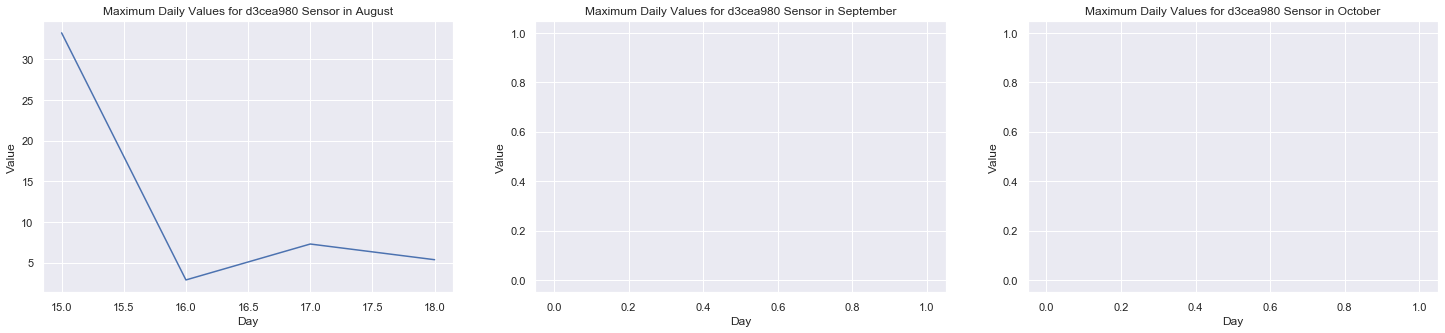

In [148]:
# Sensor 29 plot -  Data only available in August. Empty data in September and October
sensor29 = getgroup('d3cea980-8679-11e6-a353-2f6c041e2491')
sensor29aug = groupget(sensor29,8)
sensor29sep = groupget(sensor29,9)
sensor29oct = groupget(sensor29,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor29aug.Day, y=sensor29aug.value)
plt.title('Maximum Daily Values for d3cea980 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor29sep.Day, y=sensor29sep.value)
plt.title('Maximum Daily Values for d3cea980 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor29oct.Day, y=sensor29oct.value)
plt.title('Maximum Daily Values for d3cea980 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for 763bbc90 Sensor in October')

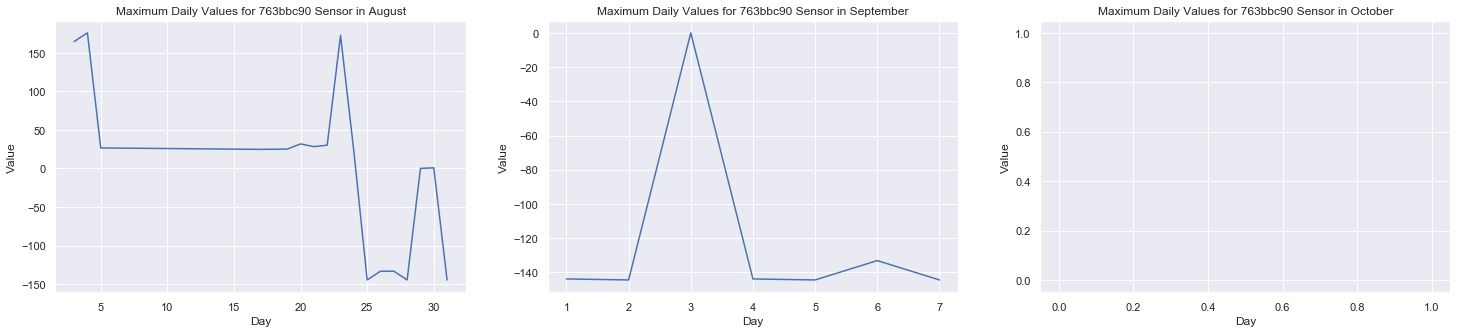

In [149]:
# Sensor 30 plot -  Data only available in August and September, October has empty values
sensor30 = getgroup('763bbc90-8679-11e6-a353-2f6c041e2491')
sensor30aug = groupget(sensor30,8)
sensor30sep = groupget(sensor30,9)
sensor30oct = groupget(sensor30,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor30aug.Day, y=sensor30aug.value)
plt.title('Maximum Daily Values for 763bbc90 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor30sep.Day, y=sensor30sep.value)
plt.title('Maximum Daily Values for 763bbc90 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor30oct.Day, y=sensor30oct.value)
plt.title('Maximum Daily Values for 763bbc90 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for 763d6a40 Sensor in October')

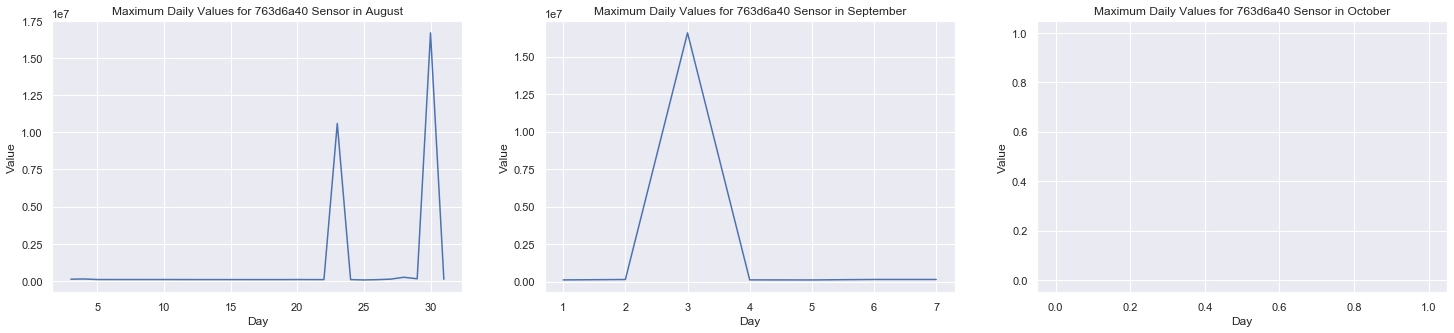

In [150]:
# Sensor 31 plot -  Data only available in August and September, October has empty values
sensor31 = getgroup('763d6a40-8679-11e6-a353-2f6c041e2491')
sensor31aug = groupget(sensor31,8)
sensor31sep = groupget(sensor31,9)
sensor31oct = groupget(sensor31,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor31aug.Day, y=sensor31aug.value)
plt.title('Maximum Daily Values for 763d6a40 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor31sep.Day, y=sensor31sep.value)
plt.title('Maximum Daily Values for 763d6a40 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor31oct.Day, y=sensor31oct.value)
plt.title('Maximum Daily Values for 763d6a40 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for 76402960 Sensor in October')

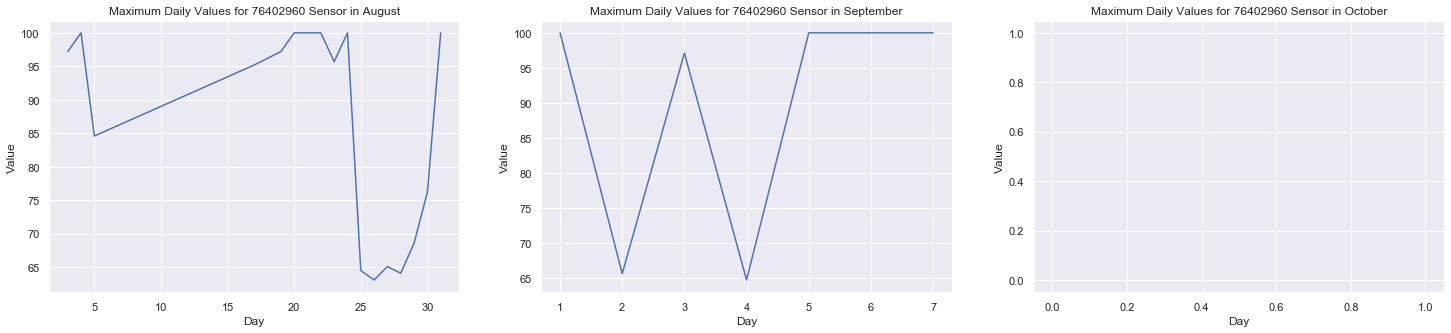

In [151]:
# Sensor 32 plot -  Data only available in August and September, October has empty values
sensor32 = getgroup('76402960-8679-11e6-a353-2f6c041e2491')
sensor32aug = groupget(sensor32,8)
sensor32sep = groupget(sensor32,9)
sensor32oct = groupget(sensor32,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor32aug.Day, y=sensor32aug.value)
plt.title('Maximum Daily Values for 76402960 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor32sep.Day, y=sensor32sep.value)
plt.title('Maximum Daily Values for 76402960 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor32oct.Day, y=sensor32oct.value)
plt.title('Maximum Daily Values for 76402960 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for d3cf6cd0 Sensor in October')

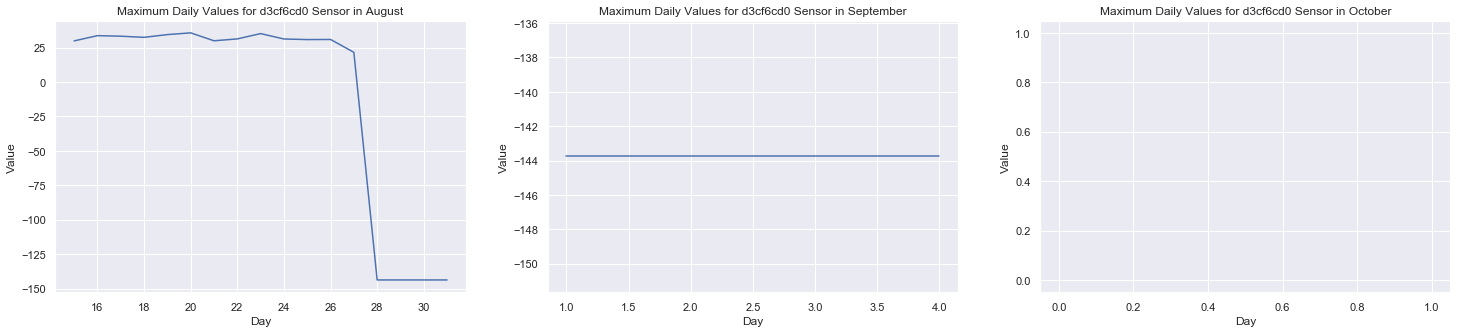

In [152]:
# Sensor 33 plot -  Data only available in August and September, October has empty values
sensor33 = getgroup('d3cf6cd0-8679-11e6-a353-2f6c041e2491')
sensor33aug = groupget(sensor33,8)
sensor33sep = groupget(sensor33,9)
sensor33oct = groupget(sensor33,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor33aug.Day, y=sensor33aug.value)
plt.title('Maximum Daily Values for d3cf6cd0 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor33sep.Day, y=sensor33sep.value)
plt.title('Maximum Daily Values for d3cf6cd0 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor33oct.Day, y=sensor33oct.value)
plt.title('Maximum Daily Values for d3cf6cd0 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for d3cd7100 Sensor in October')

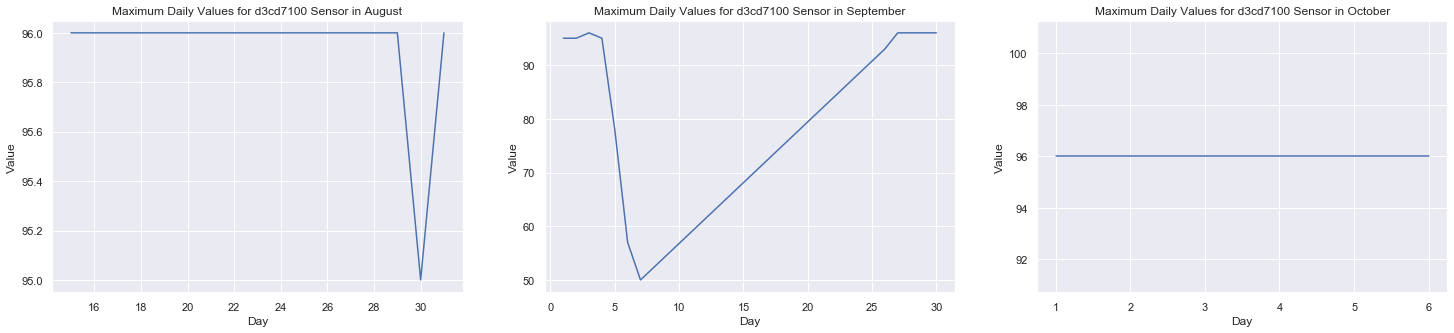

In [153]:
# Sensor 34 plot -  Data only available in August,September and October
sensor34 = getgroup('d3cd7100-8679-11e6-a353-2f6c041e2491')
sensor34aug = groupget(sensor34,8)
sensor34sep = groupget(sensor34,9)
sensor34oct = groupget(sensor34,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor34aug.Day, y=sensor34aug.value)
plt.title('Maximum Daily Values for d3cd7100 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor34sep.Day, y=sensor34sep.value)
plt.title('Maximum Daily Values for d3cd7100 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor34oct.Day, y=sensor34oct.value)
plt.title('Maximum Daily Values for d3cd7100 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for 7635f030 Sensor in September')

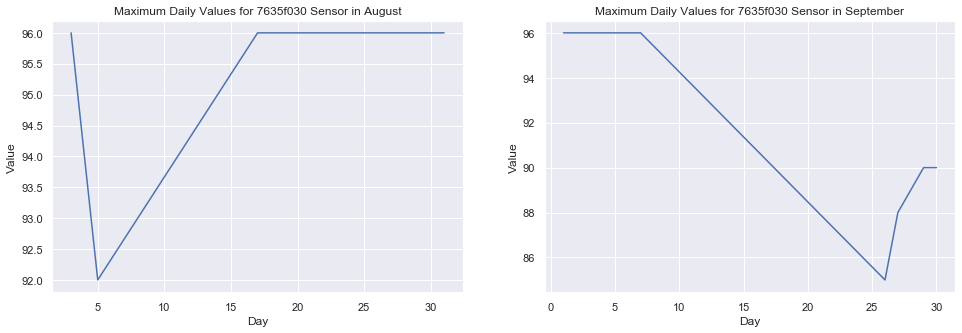

In [154]:
# Sensor 35 plot -  Data only available in August and September
sensor35 = getgroup('7635f030-8679-11e6-a353-2f6c041e2491')
sensor35aug = groupget(sensor35,8)
sensor35sep = groupget(sensor35,9)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor35aug.Day, y=sensor35aug.value)
plt.title('Maximum Daily Values for 7635f030 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor35sep.Day, y=sensor35sep.value)
plt.title('Maximum Daily Values for 7635f030 Sensor in September')


Text(0.5, 1.0, 'Maximum Daily Values for c5e80c70 Sensor in August')

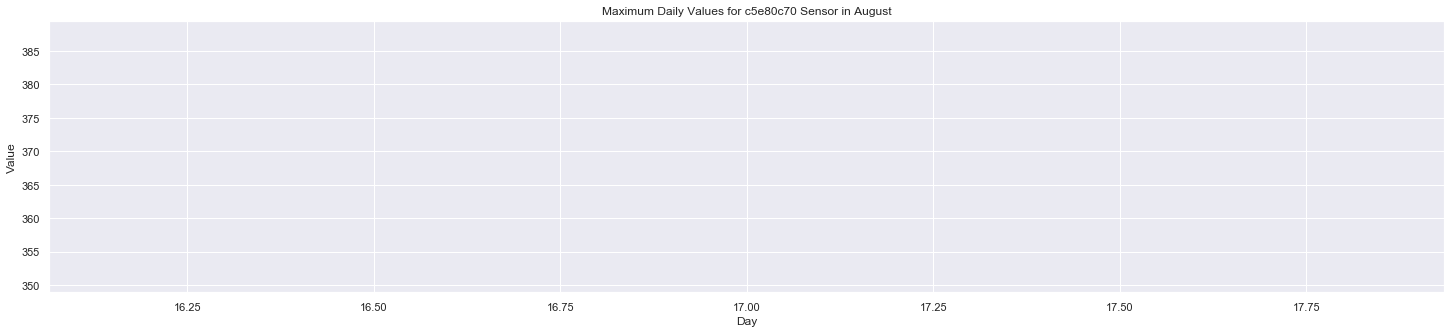

In [155]:
# Sensor 36 plot -  Empty values in August 
sensor36 = getgroup('c5e80c70-867a-11e6-a353-2f6c041e2491')
sensor36aug = groupget(sensor36,8)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor36aug.Day, y=sensor36aug.value)
plt.title('Maximum Daily Values for c5e80c70 Sensor in August')


Text(0.5, 1.0, 'Maximum Daily Values for d3d909c1 Sensor in October')

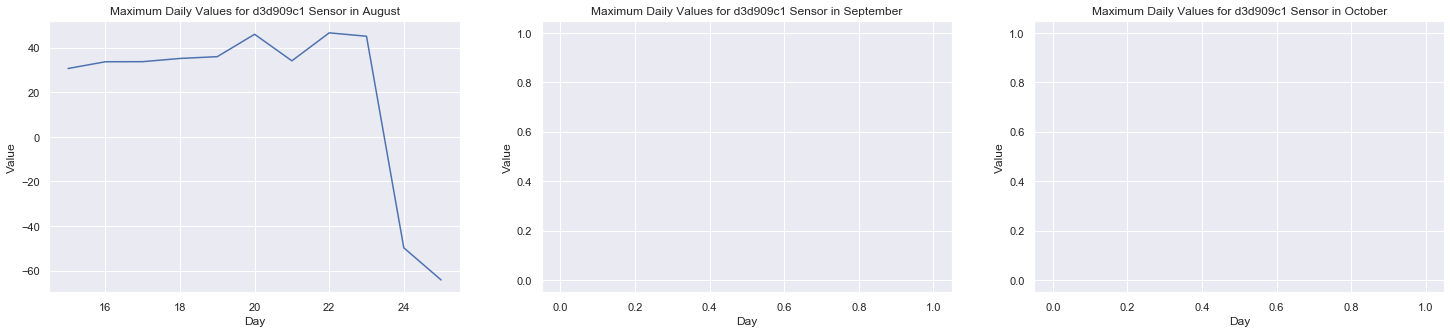

In [156]:
# Sensor 37 plot -  Data only available in August. Empty values in September and October
sensor37 = getgroup('d3d909c1-8679-11e6-a353-2f6c041e2491')
sensor37aug = groupget(sensor37,8)
sensor37sep = groupget(sensor37,9)
sensor37oct = groupget(sensor37,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor37aug.Day, y=sensor37aug.value)
plt.title('Maximum Daily Values for d3d909c1 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor37sep.Day, y=sensor37sep.value)
plt.title('Maximum Daily Values for d3d909c1 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor37oct.Day, y=sensor37oct.value)
plt.title('Maximum Daily Values for d3d909c1 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for d3cf45c0 Sensor in October')

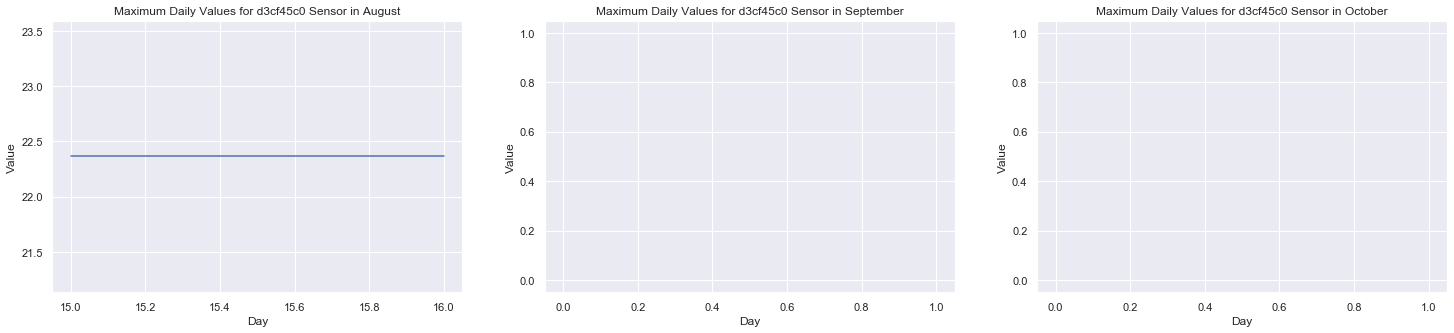

In [157]:
# Sensor 38 plot -  Data only available in August. Empty values in September and October
sensor38 = getgroup('d3cf45c0-8679-11e6-a353-2f6c041e2491')
sensor38aug = groupget(sensor38,8)
sensor38sep = groupget(sensor38,9)
sensor38oct = groupget(sensor38,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor38aug.Day, y=sensor38aug.value)
plt.title('Maximum Daily Values for d3cf45c0 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor38sep.Day, y=sensor38sep.value)
plt.title('Maximum Daily Values for d3cf45c0 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor38oct.Day, y=sensor38oct.value)
plt.title('Maximum Daily Values for d3cf45c0 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for d3d0cc60 Sensor in October')

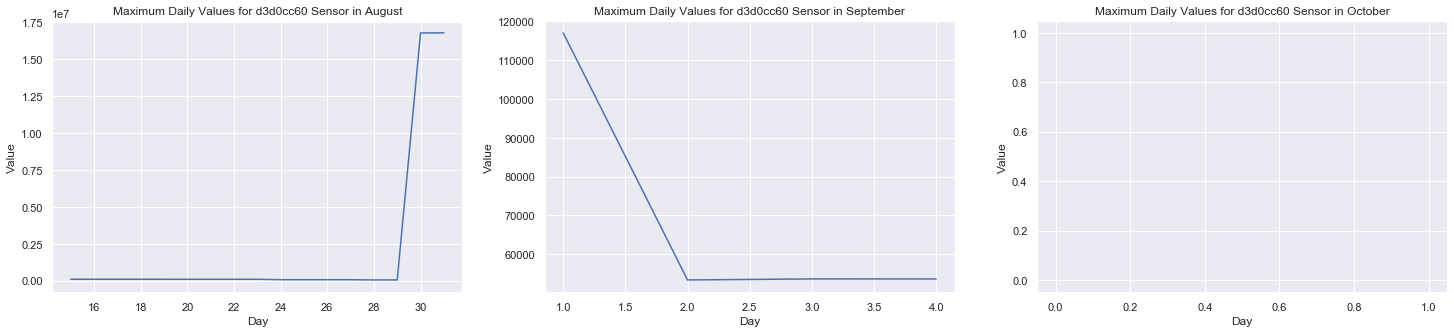

In [158]:
# Sensor 39 plot -  Data only available in August and September. Empty sensor values in October
sensor39 = getgroup('d3d0cc60-8679-11e6-a353-2f6c041e2491')
sensor39aug = groupget(sensor39,8)
sensor39sep = groupget(sensor39,9)
sensor39oct = groupget(sensor39,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor39aug.Day, y=sensor39aug.value)
plt.title('Maximum Daily Values for d3d0cc60 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor39sep.Day, y=sensor39sep.value)
plt.title('Maximum Daily Values for d3d0cc60 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor39oct.Day, y=sensor39oct.value)
plt.title('Maximum Daily Values for d3d0cc60 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for d3d56040 Sensor in October')

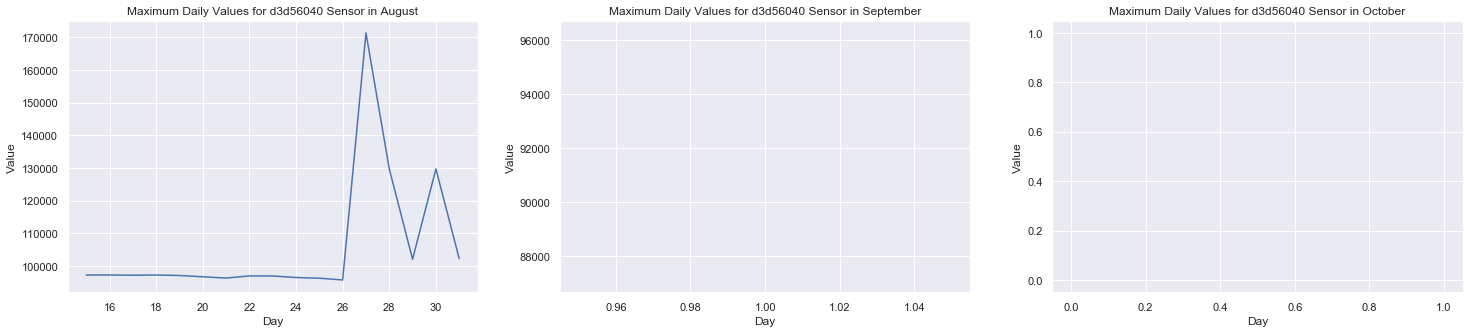

In [159]:
# Sensor 40 plot -  Data only available in August. Empty values in September and October
sensor40 = getgroup('d3d56040-8679-11e6-a353-2f6c041e2491')
sensor40aug = groupget(sensor40,8)
sensor40sep = groupget(sensor40,9)
sensor40oct = groupget(sensor40,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor40aug.Day, y=sensor40aug.value)
plt.title('Maximum Daily Values for d3d56040 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor40sep.Day, y=sensor40sep.value)
plt.title('Maximum Daily Values for d3d56040 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor40oct.Day, y=sensor40oct.value)
plt.title('Maximum Daily Values for d3d56040 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for e66592c0 Sensor in September')

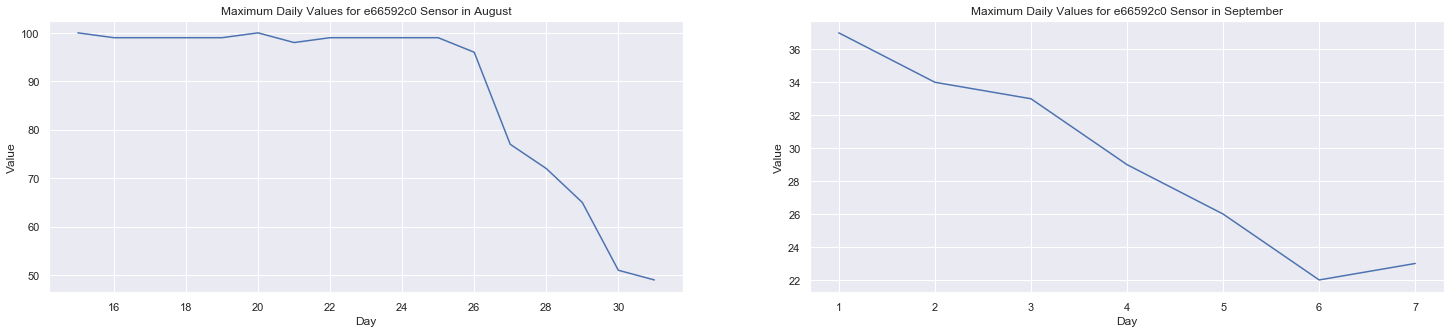

In [160]:
# Sensor 41 plot -  Data available in August and September
sensor41 = getgroup('e66592c0-8679-11e6-a353-2f6c041e2491')
sensor41aug = groupget(sensor41,8)
sensor41sep = groupget(sensor41,9)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor41aug.Day, y=sensor41aug.value)
plt.title('Maximum Daily Values for e66592c0 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor41sep.Day, y=sensor41sep.value)
plt.title('Maximum Daily Values for e66592c0 Sensor in September')


Text(0.5, 1.0, 'Maximum Daily Values for e6691530 Sensor in September')

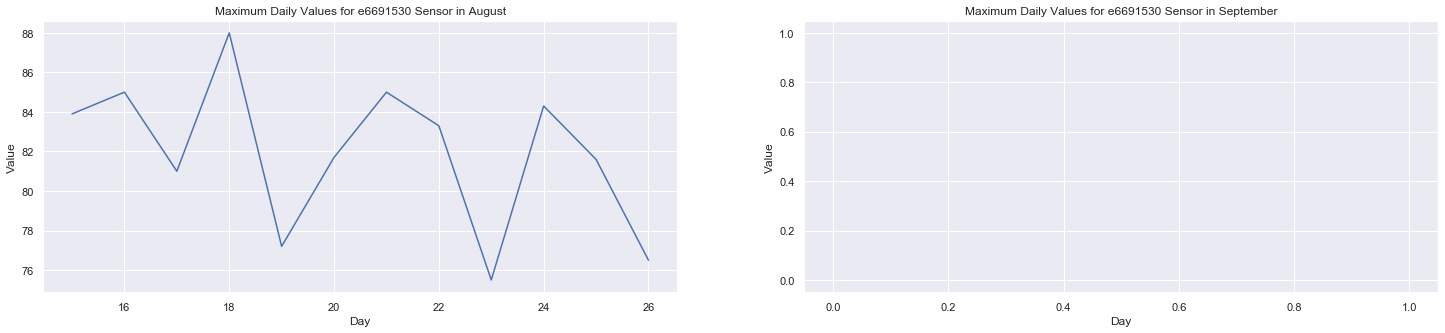

In [161]:
# Sensor 42 plot -  Data only available in August. Empty values in September
sensor42 = getgroup('e6691530-8679-11e6-a353-2f6c041e2491')
sensor42aug = groupget(sensor42,8)
sensor42sep = groupget(sensor42,9)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor42aug.Day, y=sensor42aug.value)
plt.title('Maximum Daily Values for e6691530 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor42sep.Day, y=sensor42sep.value)
plt.title('Maximum Daily Values for e6691530 Sensor in September')

Text(0.5, 1.0, 'Maximum Daily Values for d3d909c0 Sensor in October')

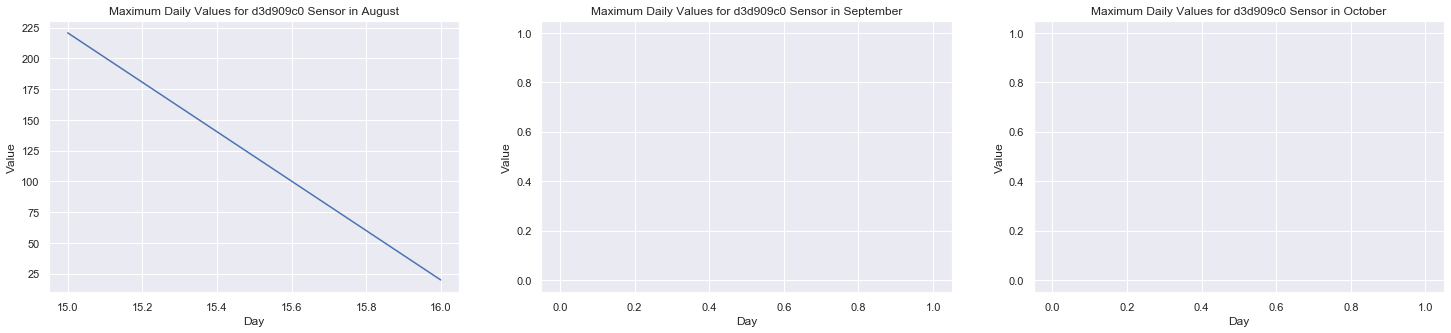

In [162]:
# Sensor 43 plot -  Data only available in August. Empty values in September and October
sensor43 = getgroup('d3d909c0-8679-11e6-a353-2f6c041e2491')
sensor43aug = groupget(sensor43,8)
sensor43sep = groupget(sensor43,9)
sensor43oct = groupget(sensor43,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor43aug.Day, y=sensor43aug.value)
plt.title('Maximum Daily Values for d3d909c0 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor43sep.Day, y=sensor43sep.value)
plt.title('Maximum Daily Values for d3d909c0 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor43oct.Day, y=sensor43oct.value)
plt.title('Maximum Daily Values for d3d909c0 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for d3d168a0 Sensor in October')

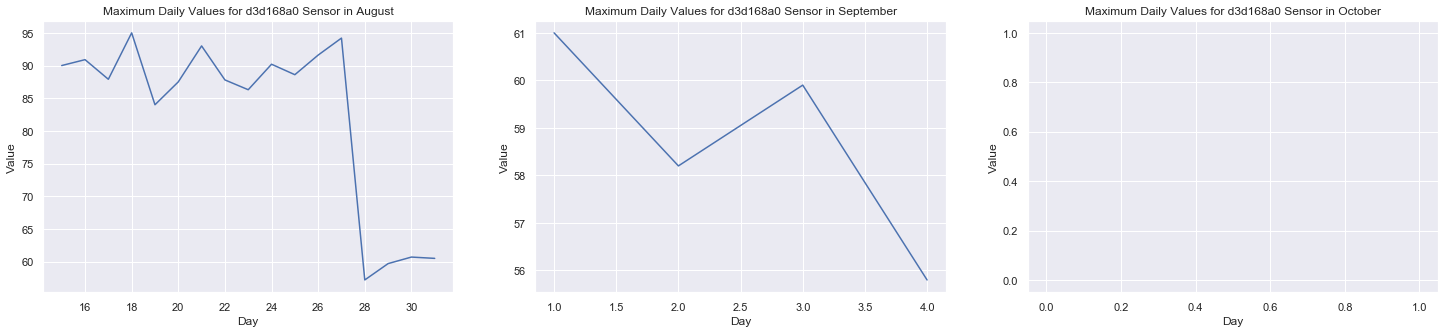

In [163]:
# Sensor 44 plot -  Data only available in August and September. Empty values in October
sensor44 = getgroup('d3d168a0-8679-11e6-a353-2f6c041e2491')
sensor44aug = groupget(sensor44,8)
sensor44sep = groupget(sensor44,9)
sensor44oct = groupget(sensor44,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor44aug.Day, y=sensor44aug.value)
plt.title('Maximum Daily Values for d3d168a0 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor44sep.Day, y=sensor44sep.value)
plt.title('Maximum Daily Values for d3d168a0 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor44oct.Day, y=sensor44oct.value)
plt.title('Maximum Daily Values for d3d168a0 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for d3d53930 Sensor in October')

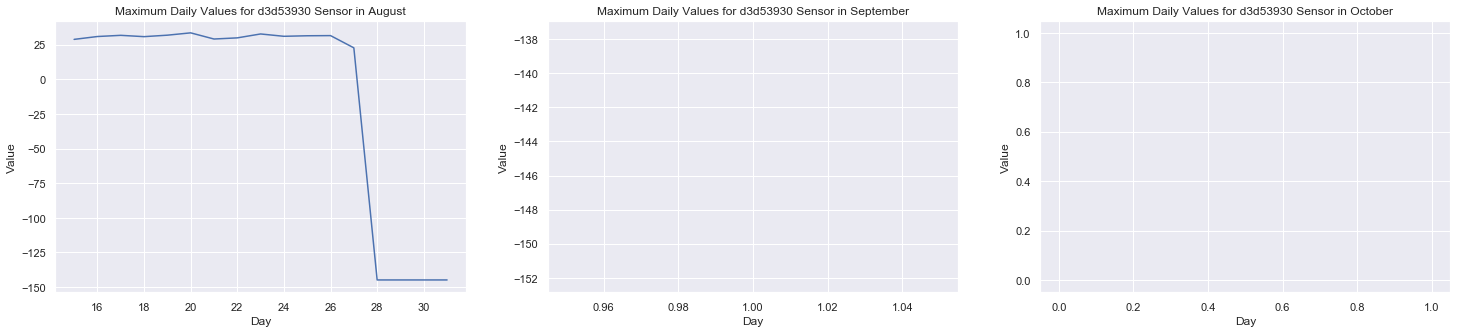

In [164]:
# Sensor 45 plot -  Data only available in August. Empty values in September and October
sensor45 = getgroup('d3d53930-8679-11e6-a353-2f6c041e2491')
sensor45aug = groupget(sensor45,8)
sensor45sep = groupget(sensor45,9)
sensor45oct = groupget(sensor45,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor45aug.Day, y=sensor45aug.value)
plt.title('Maximum Daily Values for d3d53930 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor45sep.Day, y=sensor45sep.value)
plt.title('Maximum Daily Values for d3d53930 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor45oct.Day, y=sensor45oct.value)
plt.title('Maximum Daily Values for d3d53930 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for e66851e1 Sensor in September')

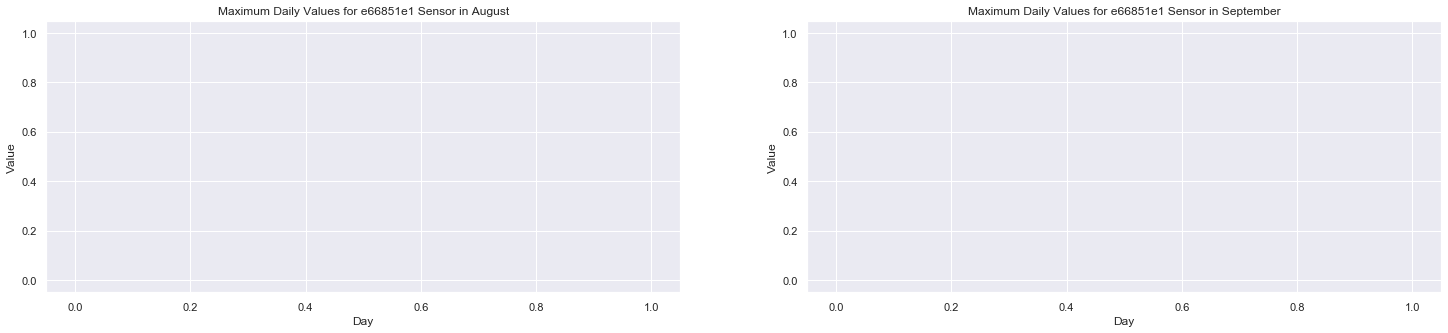

In [165]:
# Sensor 46 plot -  Empty values in August and September
sensor46 = getgroup('e66851e1-8679-11e6-a353-2f6c041e2491')
sensor46aug = groupget(sensor46,8)
sensor46sep = groupget(sensor46,9)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor46aug.Day, y=sensor46aug.value)
plt.title('Maximum Daily Values for e66851e1 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor46sep.Day, y=sensor46sep.value)
plt.title('Maximum Daily Values for e66851e1 Sensor in September')


Text(0.5, 1.0, 'Maximum Daily Values for c5e8a8b0 Sensor in August')

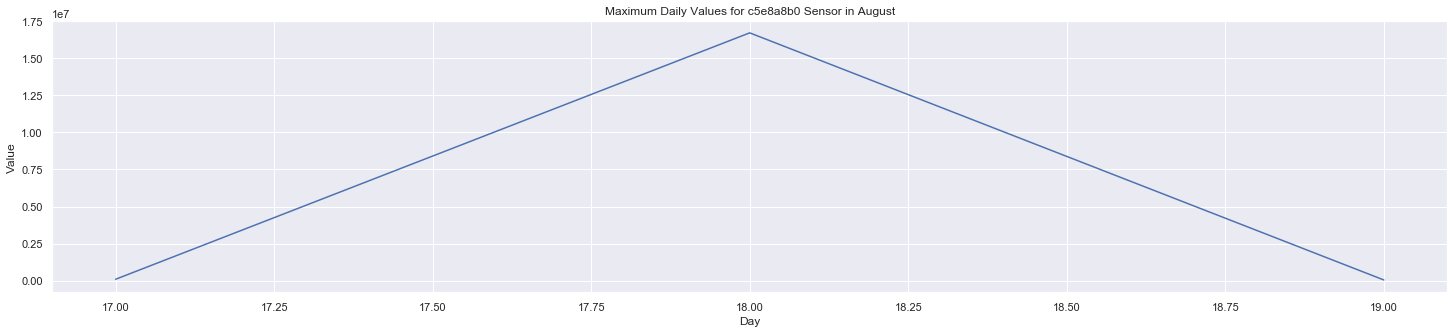

In [166]:
# Sensor 47 plot -  Data only available in August.
sensor47 = getgroup('c5e8a8b0-867a-11e6-a353-2f6c041e2491')
sensor47aug = groupget(sensor47,8)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor47aug.Day, y=sensor47aug.value)
plt.title('Maximum Daily Values for c5e8a8b0 Sensor in August')

Text(0.5, 1.0, 'Maximum Daily Values for 1248ff60 Sensor in September')

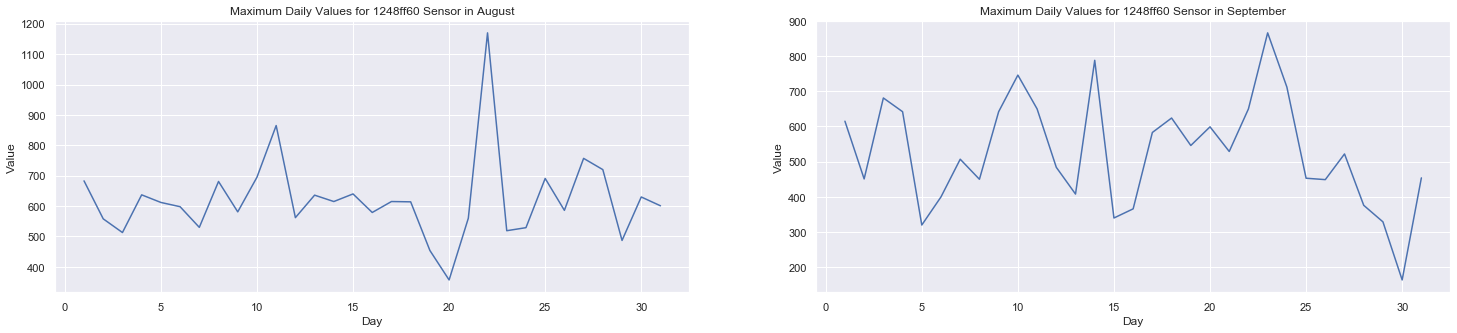

In [167]:
# Sensor 48 plot -  Complete data available in July and August.
sensor48 = getgroup('1248ff60-e707-11e6-89c8-314aa4f67f8c')
sensor48jul = groupget(sensor48,7)
sensor48aug = groupget(sensor48,8)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor48jul.Day, y=sensor48jul.value)
plt.title('Maximum Daily Values for 1248ff60 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor48aug.Day, y=sensor48aug.value)
plt.title('Maximum Daily Values for 1248ff60 Sensor in September')

Text(0.5, 1.0, 'Maximum Daily Values for e6678e90 Sensor in September')

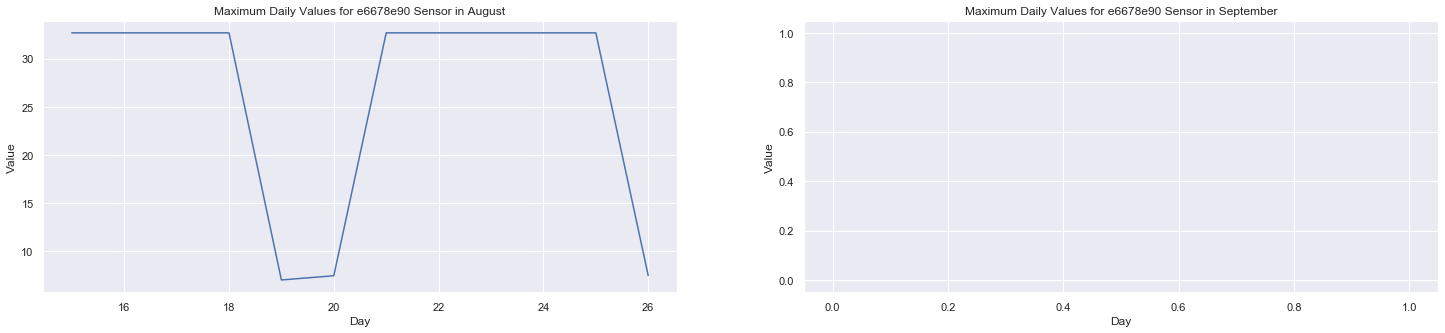

In [168]:
# Sensor 49 plot -  Data only available in August. Empty values in September
sensor49 = getgroup('e6678e90-8679-11e6-a353-2f6c041e2491')
sensor49aug = groupget(sensor49,8)
sensor49sep = groupget(sensor49,9)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor49aug.Day, y=sensor49aug.value)
plt.title('Maximum Daily Values for e6678e90 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor49sep.Day, y=sensor49sep.value)
plt.title('Maximum Daily Values for e6678e90 Sensor in September')

Text(0.5, 1.0, 'Maximum Daily Values for d3d698c0 Sensor in October')

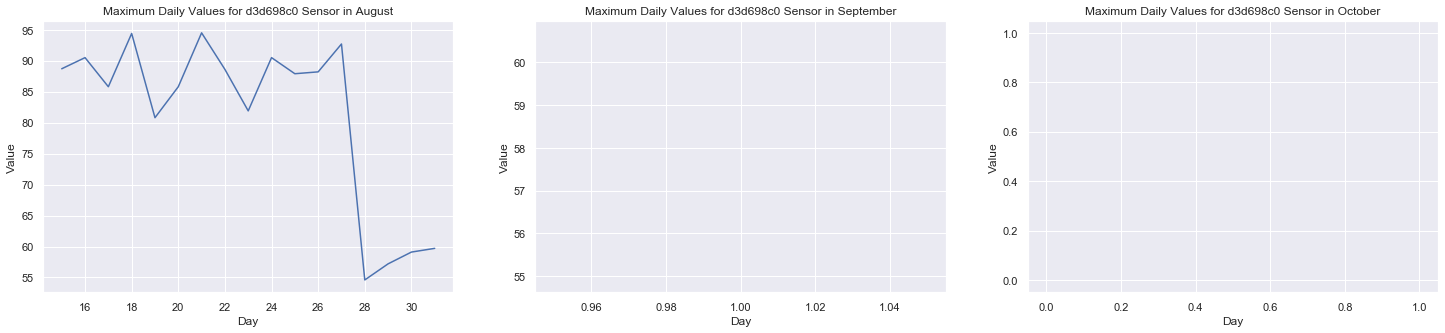

In [169]:
# Sensor 50 plot -  Data only available in August. Empty values in September and October
sensor50 = getgroup('d3d698c0-8679-11e6-a353-2f6c041e2491')
sensor50aug = groupget(sensor50,8)
sensor50sep = groupget(sensor50,9)
sensor50oct = groupget(sensor50,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor50aug.Day, y=sensor50aug.value)
plt.title('Maximum Daily Values for d3d698c0 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor50sep.Day, y=sensor50sep.value)
plt.title('Maximum Daily Values for d3d698c0 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor50oct.Day, y=sensor50oct.value)
plt.title('Maximum Daily Values for d3d698c0 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for d3db2ca0- Sensor in October')

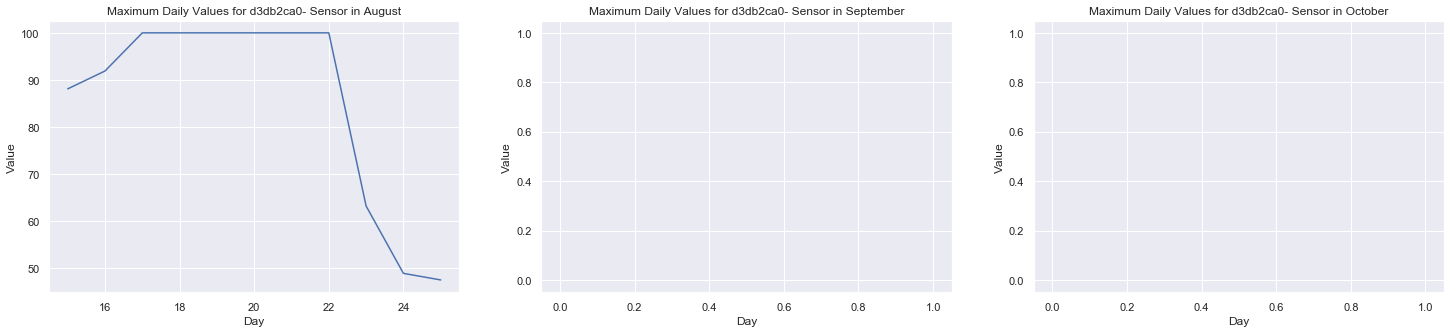

In [170]:
# Sensor 51 plot -  Data only available in August. Empty values in September and October
sensor51 = getgroup('d3db2ca0-8679-11e6-a353-2f6c041e2491')
sensor51aug = groupget(sensor51,8)
sensor51sep = groupget(sensor51,9)
sensor51oct = groupget(sensor51,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor51aug.Day, y=sensor51aug.value)
plt.title('Maximum Daily Values for d3db2ca0- Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor51sep.Day, y=sensor51sep.value)
plt.title('Maximum Daily Values for d3db2ca0- Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor51oct.Day, y=sensor51oct.value)
plt.title('Maximum Daily Values for d3db2ca0- Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for d3d33d60 Sensor in October')

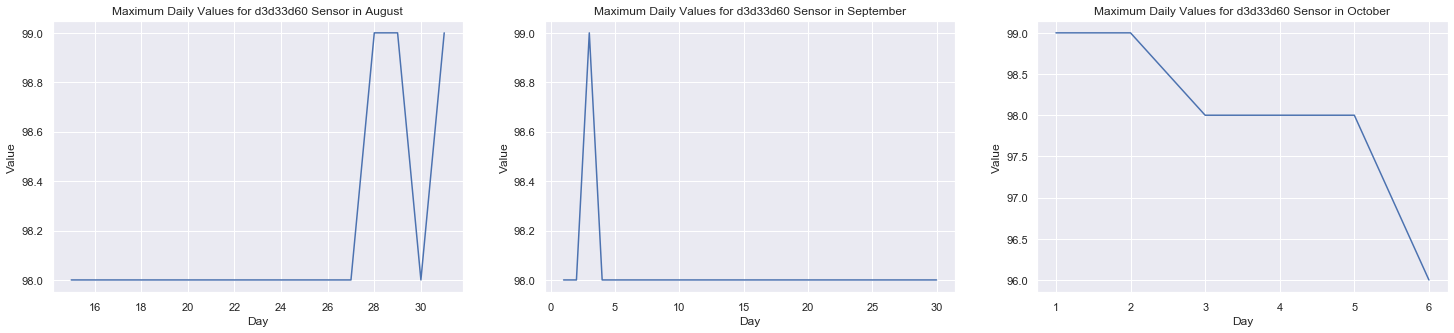

In [171]:
# Sensor 52 plot -  Data only available in August, September and October
sensor52 = getgroup('d3d33d60-8679-11e6-a353-2f6c041e2491')
sensor52aug = groupget(sensor52,8)
sensor52sep = groupget(sensor52,9)
sensor52oct = groupget(sensor52,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor52aug.Day, y=sensor52aug.value)
plt.title('Maximum Daily Values for d3d33d60 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor52sep.Day, y=sensor52sep.value)
plt.title('Maximum Daily Values for d3d33d60 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor52oct.Day, y=sensor52oct.value)
plt.title('Maximum Daily Values for d3d33d60 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for c5e881a1 Sensor in August')

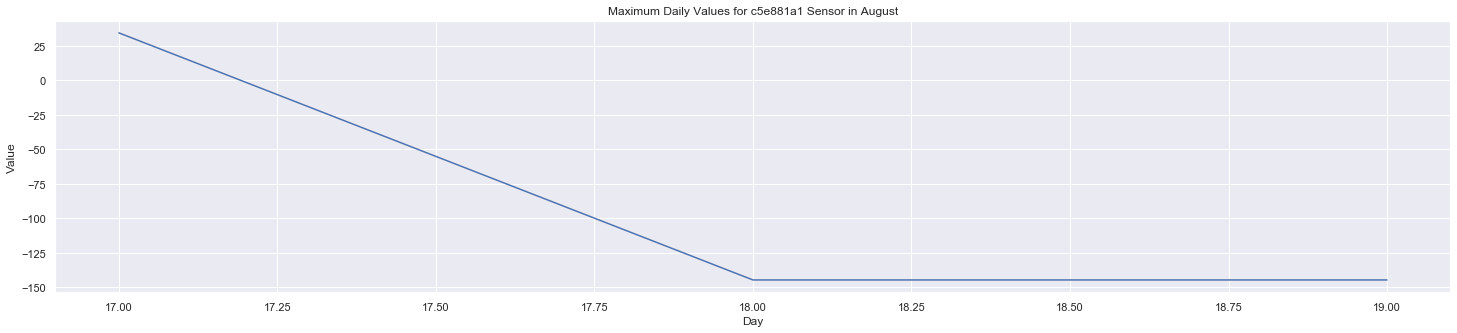

In [172]:
# Sensor 53 plot -  Data only available in August.
sensor53 = getgroup('c5e881a1-867a-11e6-a353-2f6c041e2491')
sensor53aug = groupget(sensor53,8)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor53aug.Day, y=sensor53aug.value)
plt.title('Maximum Daily Values for c5e881a1 Sensor in August')


Text(0.5, 1.0, 'Maximum Daily Values for c5e881a0 Sensor in August')

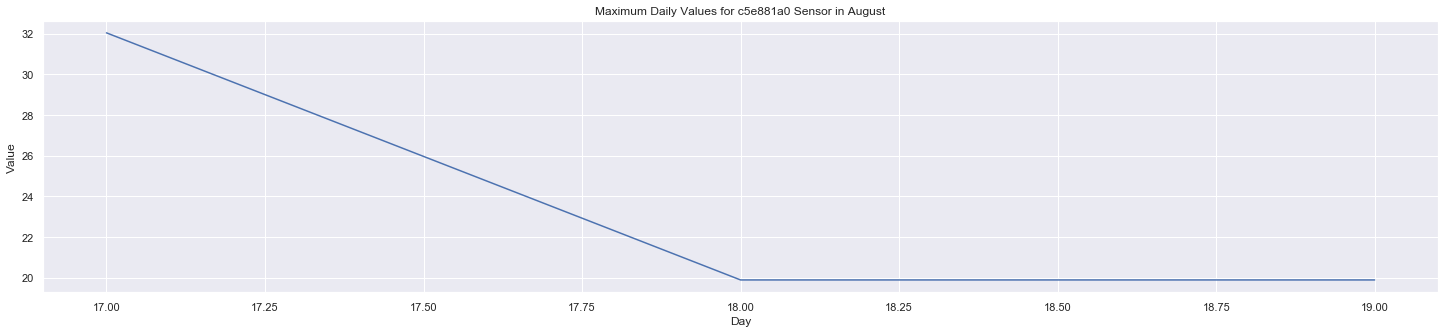

In [173]:
# Sensor 54 plot -  Data only available in August. 
sensor54 = getgroup('c5e881a0-867a-11e6-a353-2f6c041e2491')
sensor54aug = groupget(sensor54,8)
plt.figure(figsize=(25,5))
plt.subplot(1,1,1)
custom_plot(x=sensor54aug.Day, y=sensor54aug.value)
plt.title('Maximum Daily Values for c5e881a0 Sensor in August')


Text(0.5, 1.0, 'Maximum Daily Values for d3d3b290 Sensor in October')

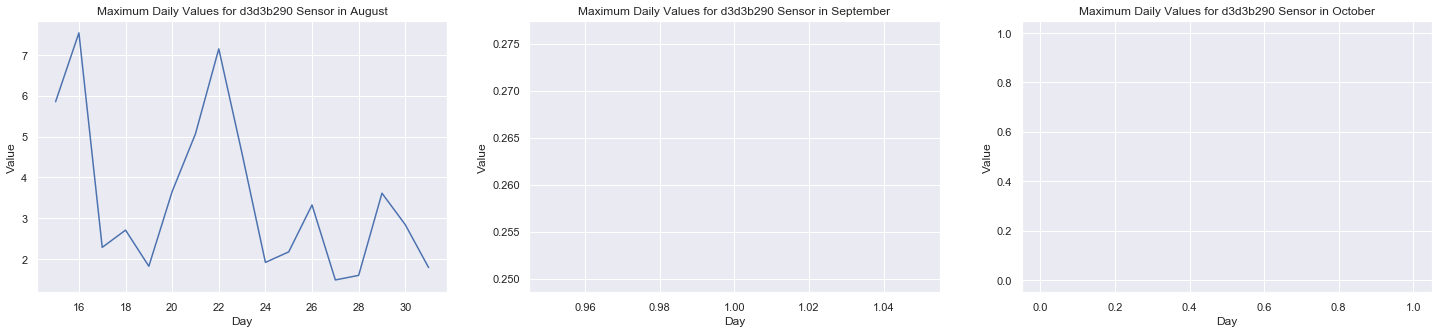

In [174]:
# Sensor 55 plot -  Data only available in August. Empty values in September and October
sensor55 = getgroup('d3d3b290-8679-11e6-a353-2f6c041e2491')
sensor55aug = groupget(sensor55,8)
sensor55sep = groupget(sensor55,9)
sensor55oct = groupget(sensor55,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor55aug.Day, y=sensor55aug.value)
plt.title('Maximum Daily Values for d3d3b290 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor55sep.Day, y=sensor55sep.value)
plt.title('Maximum Daily Values for d3d3b290 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor55oct.Day, y=sensor55oct.value)
plt.title('Maximum Daily Values for d3d3b290 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for d3db53b0 Sensor in October')

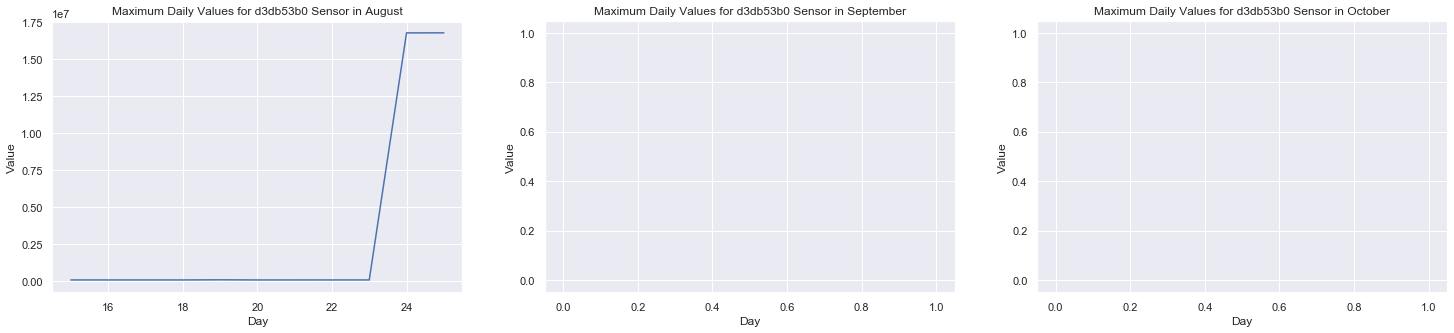

In [175]:
# Sensor 56 plot -  Data only available in August. Empty values in September and October
sensor56 = getgroup('d3db53b0-8679-11e6-a353-2f6c041e2491')
sensor56aug = groupget(sensor56,8)
sensor56sep = groupget(sensor56,9)
sensor56oct = groupget(sensor56,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor56aug.Day, y=sensor56aug.value)
plt.title('Maximum Daily Values for d3db53b0 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor56sep.Day, y=sensor56sep.value)
plt.title('Maximum Daily Values for d3db53b0 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor56oct.Day, y=sensor56oct.value)
plt.title('Maximum Daily Values for d3db53b0 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for e66851e0 Sensor in September')

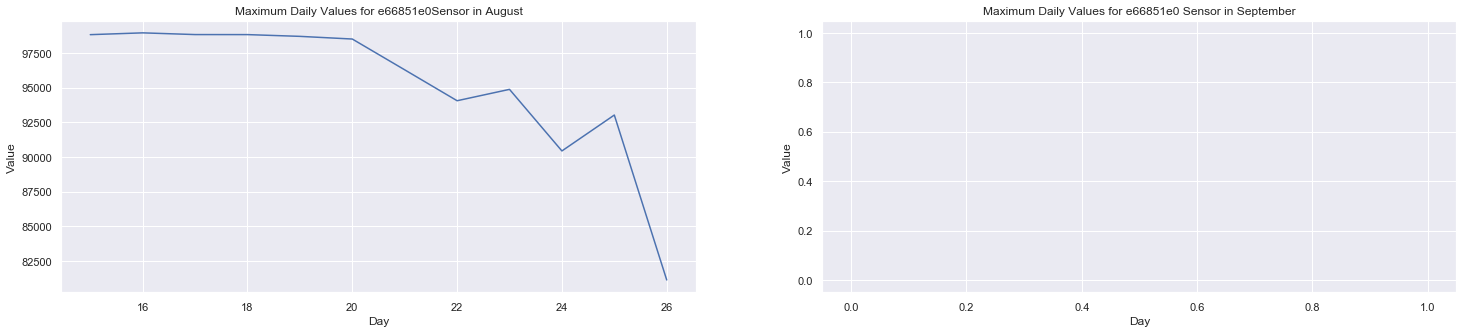

In [176]:
# Sensor 57 plot -  Data only available in August. Empty values in September.
sensor57 = getgroup('e66851e0-8679-11e6-a353-2f6c041e2491')
sensor57aug = groupget(sensor57,8)
sensor57sep = groupget(sensor57,9)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor57aug.Day, y=sensor57aug.value)
plt.title('Maximum Daily Values for e66851e0Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor57sep.Day, y=sensor57sep.value)
plt.title('Maximum Daily Values for e66851e0 Sensor in September')


Text(0.5, 1.0, 'Maximum Daily Values for d3d73500 Sensor in October')

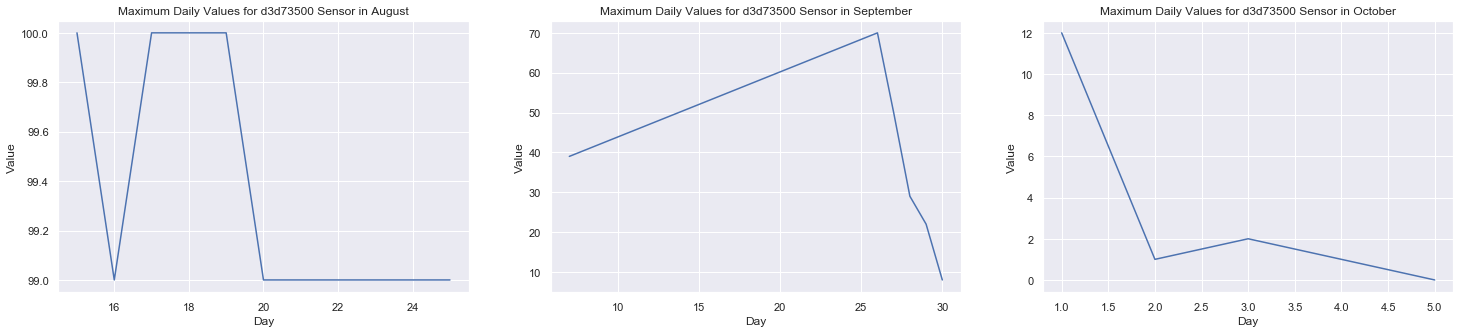

In [177]:
# Sensor 58 plot -  Data only available in August, September and October
sensor58 = getgroup('d3d73500-8679-11e6-a353-2f6c041e2491')
sensor58aug = groupget(sensor58,8)
sensor58sep = groupget(sensor58,9)
sensor58oct = groupget(sensor58,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor58aug.Day, y=sensor58aug.value)
plt.title('Maximum Daily Values for d3d73500 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor58sep.Day, y=sensor58sep.value)
plt.title('Maximum Daily Values for d3d73500 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor58oct.Day, y=sensor58oct.value)
plt.title('Maximum Daily Values for d3d73500 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for d3d7d140 Sensor in October')

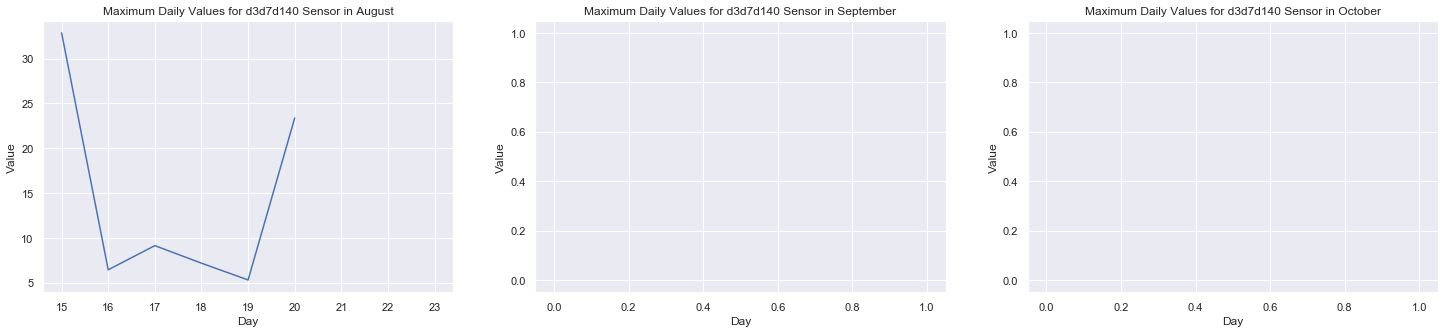

In [178]:
# Sensor 59 plot -  Data only available in August. Empty values in September and October
sensor59 = getgroup('d3d7d140-8679-11e6-a353-2f6c041e2491')
sensor59aug = groupget(sensor59,8)
sensor59sep = groupget(sensor59,9)
sensor59oct = groupget(sensor59,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor59aug.Day, y=sensor59aug.value)
plt.title('Maximum Daily Values for d3d7d140 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor59sep.Day, y=sensor59sep.value)
plt.title('Maximum Daily Values for d3d7d140 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor59oct.Day, y=sensor59oct.value)
plt.title('Maximum Daily Values for d3d7d140 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for d3d3b291 Sensor in October')

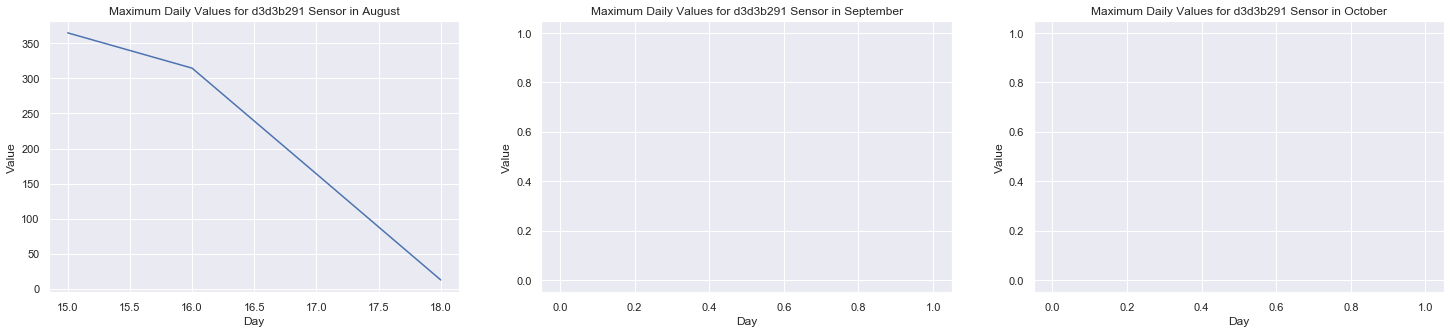

In [179]:
# Sensor 60 plot -  Data only available in August. Empty values in September and October
sensor60 = getgroup('d3d3b291-8679-11e6-a353-2f6c041e2491')
sensor60aug = groupget(sensor60,8)
sensor60sep = groupget(sensor60,9)
sensor60oct = groupget(sensor60,10)
plt.figure(figsize=(25,5))
plt.subplot(1,3,1)
custom_plot(x=sensor60aug.Day, y=sensor60aug.value)
plt.title('Maximum Daily Values for d3d3b291 Sensor in August')
plt.subplot(1,3,2)
custom_plot(x=sensor60sep.Day, y=sensor60sep.value)
plt.title('Maximum Daily Values for d3d3b291 Sensor in September')
plt.subplot(1,3,3)
custom_plot(x=sensor60oct.Day, y=sensor60oct.value)
plt.title('Maximum Daily Values for d3d3b291 Sensor in October')

Text(0.5, 1.0, 'Maximum Daily Values for e6678e91 Sensor in September')

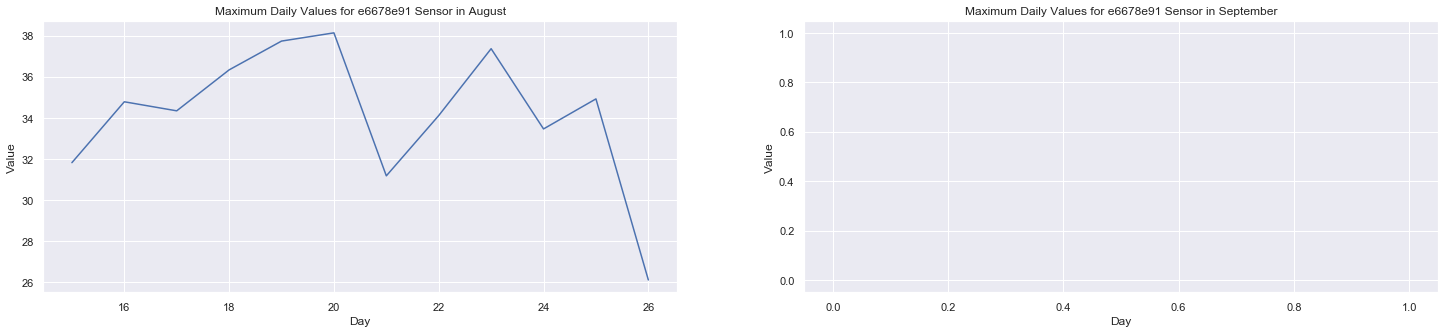

In [180]:
# Sensor 61 plot -  Data only available in August. Empty values in September.
sensor61 = getgroup('e6678e91-8679-11e6-a353-2f6c041e2491')
sensor61aug = groupget(sensor61,8)
sensor61sep = groupget(sensor61,9)
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
custom_plot(x=sensor61aug.Day, y=sensor61aug.value)
plt.title('Maximum Daily Values for e6678e91 Sensor in August')
plt.subplot(1,2,2)
custom_plot(x=sensor61sep.Day, y=sensor61sep.value)
plt.title('Maximum Daily Values for e6678e91 Sensor in September')

## Merge Dataframes

In [181]:
# Merge datatypes and sensors data
first = pd.merge(datatypes, sensors, left_on='id', right_on='data_type_id', how='left')

In [182]:
first.head()

id_x         type  si_unit type_id  \
0  35dcb3c0-8679-11e6-bda3-ef77801087ee  temperature  celcius     TCA   
1  35dcb3c0-8679-11e6-bda3-ef77801087ee  temperature  celcius     TCA   
2  35dcb3c0-8679-11e6-bda3-ef77801087ee  temperature  celcius     TCA   
3  35dcb3c0-8679-11e6-bda3-ef77801087ee  temperature  celcius     TCA   
4  35dcb3c0-8679-11e6-bda3-ef77801087ee  temperature  celcius     TCA   

                                   id_y description  data_frequency   status  \
0  763ca6f0-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
1  c15a6371-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
2  7644bd40-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
3  c15f9391-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   
4  763bbc90-8679-11e6-a353-2f6c041e2491          \N         1800000  OFFLINE   

               created_at                  updated_at  \
0  2016-08-03 04:39:25+00  2016-09-29 20:13:52.803+00   
1  2016-08-07 00:51:40+00  2016-09-29 20:13:52.836+00   
2  2016-08-03 22:09:40+00  2016-09-29 19:20:17.417+00   
3  2016-08-10 04:20:22+00  2016-09-29 19:20:17.516+00   
4  2016-08-03 21:50:32+00  2016-09-30 18:12:04.578+00   

                           data_type_id                               node_id  
0  35dcb3c0-8679-11e6-bda3-ef77801087ee  762b8ff0-8679-11e6-a353-2f6c041e2491  
1  35dcb3c0-8679-11e6-bda3-ef77801087ee  c147ece0-8679-11e6-a353-2f6c041e2491  
2  35dcb3c0-8679-11e6-bda3-ef77801087ee  76309900-8679-11e6-a353-2f6c041e2491  
3  35dcb3c0-8679-11e6-bda3-ef77801087ee  c14ccee0-8679-11e6-a353-2f6c041e2491  
4  35dcb3c0-8679-11e6-bda3-ef77801087ee  762c5340-8679-11e6-a353-2f6c041e2491

### 3.0 Descriptive Analysis One data frame at a time **


3.1 Question: What does this achieve? Why should we do this?

In [183]:
datapoints.describe()

value            Day          Month      Year
count  6.345600e+04  176534.000000  176534.000000  176534.0
mean   1.436540e+05      16.774842       8.683704    2016.0
std    1.497966e+06      11.383741       0.685448       0.0
min   -1.529700e+02       1.000000       7.000000    2016.0
25%    2.524000e+01       5.000000       8.000000    2016.0
50%    7.300000e+01      21.000000       9.000000    2016.0
75%    9.900000e+01      28.000000       9.000000    2016.0
max    1.677295e+07      31.000000      10.000000    2016.0

In [184]:
sensors.describe()

data_frequency
count            61.0
mean        1800000.0
std               0.0
min         1800000.0
25%         1800000.0
50%         1800000.0
75%         1800000.0
max         1800000.0

In [185]:
nodes.describe()

id name description location  \
count                                     11   11          11       11   
unique                                    11   11           1        1   
top     ede3ed60-e701-11e6-83c1-01ce06e6d17f   N5          \N       \N   
freq                                       1    1          11       11   

         status              created_at                  updated_at  \
count        11                      11                          11   
unique        1                      11                          10   
top     OFFLINE  2016-08-03 22:09:40+00  2016-10-07 07:43:05.001+00   
freq         11                       1                           2   

                                  volcano_id  
count                                     11  
unique                                     1  
top     35dc3e90-8679-11e6-bda3-ef77801087ee  
freq                                      11

In [186]:
datatypes.describe()

id      type si_unit type_id
count                                      7         7       7       7
unique                                     7         7       6       7
top     35dcdad2-8679-11e6-bda3-ef77801087ee  pressure     ppm  GP_H2S
freq                                       1         1       2       1

This gives a descriptive analysis of all the dataset we have. We are able to have a glimpse of the count, maximum, minimum and uniqueness of the data. 

3.2: How many sensors of each type are there?

In [187]:
# Check value counts of the sensors. There are 7 types of each sensors.
print("Numbers of sensors of each type:",first.type_id.nunique()), first.type_id.value_counts()

Numbers of sensors of each type: 7


(None, GP_H2S    10
 GP_CO2    10
 HUMA      10
 BAT       10
 PA        10
 TCA       10
 RSAM       1
 Name: type_id, dtype: int64)

----

### 4.0 Creating a Digital Thread from the data sets**

**Goal: Merge everything into one wide data table ** 

Take the raw `datapoints` data frame and merge it with all the `sensors` and their types.

In [188]:
# drop some unwanted double columns
first_drop = first.drop(['id_x'], axis=1)

In [189]:
# Rename id_y to sensor_id for easy identification
first_rename = first_drop.rename({'id_y': 'sensor_id'}, axis=1)


In [190]:
# make a second match of the first data merged and the datapoints data
merged_data = pd.merge(datapoints,first_rename, left_on='sensor_id', right_on='sensor_id', how='left')

In [191]:
merged_data.describe()   # Value statistical analysis won't make sense now cos it represents different type of data ppts

value            Day          Month      Year  data_frequency
count  6.345600e+04  176534.000000  176534.000000  176534.0        176534.0
mean   1.436540e+05      16.774842       8.683704    2016.0       1800000.0
std    1.497966e+06      11.383741       0.685448       0.0             0.0
min   -1.529700e+02       1.000000       7.000000    2016.0       1800000.0
25%    2.524000e+01       5.000000       8.000000    2016.0       1800000.0
50%    7.300000e+01      21.000000       9.000000    2016.0       1800000.0
75%    9.900000e+01      28.000000       9.000000    2016.0       1800000.0
max    1.677295e+07      31.000000      10.000000    2016.0       1800000.0

In [192]:
# Drop the unwanted data and double columns
merged_data_drop = merged_data.drop(['id','created_at','updated_at','data_type_id','node_id',
                         'description', 'status','data_frequency'], axis=1)

In [193]:
# Check data shape
merged_data_drop.shape

(176534, 10)

In [194]:
# check first 5
merged_data_drop.head()

value                 timestamp                             sensor_id  \
0     98.000 2016-08-03 04:39:25+00:00  7635c920-8679-11e6-a353-2f6c041e2491   
1     33.198 2016-08-03 04:39:25+00:00  763b9580-8679-11e6-a353-2f6c041e2491   
2     29.300 2016-08-03 04:39:25+00:00  763ca6f0-8679-11e6-a353-2f6c041e2491   
3  96893.110 2016-08-03 04:39:25+00:00  763d9150-8679-11e6-a353-2f6c041e2491   
4    459.736 2016-08-03 04:39:25+00:00  763701a1-8679-11e6-a353-2f6c041e2491   

   Day  Month  Year      Time                            type     si_unit  \
0    3      8  2016  04:39:25                         battery  percentage   
1    3      8  2016  04:39:25  hydrogen sulfide concentration         ppm   
2    3      8  2016  04:39:25                     temperature     celcius   
3    3      8  2016  04:39:25                        pressure      pascal   
4    3      8  2016  04:39:25    carbon dioxide concentration         ppm   

  type_id  
0     BAT  
1  GP_H2S  
2     TCA  
3      PA  
4  GP_CO2

In [195]:
#Check last 5 
merged_data_drop.tail()

value                 timestamp                             sensor_id  \
176529  125.0 2016-08-31 19:00:01+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c   
176530  143.0 2016-08-31 19:50:00+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c   
176531  175.0 2016-08-31 21:00:02+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c   
176532  164.0 2016-08-31 21:50:00+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c   
176533   89.0 2016-08-31 23:00:00+00:00  1248ff60-e707-11e6-89c8-314aa4f67f8c   

        Day  Month  Year      Time  type si_unit type_id  
176529   31      8  2016  19:00:01  RSAM  counts    RSAM  
176530   31      8  2016  19:50:00  RSAM  counts    RSAM  
176531   31      8  2016  21:00:02  RSAM  counts    RSAM  
176532   31      8  2016  21:50:00  RSAM  counts    RSAM  
176533   31      8  2016  23:00:00  RSAM  counts    RSAM

In [196]:
# 64.05 % of the values are missing.
merged_data_drop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176534 entries, 0 to 176533
Data columns (total 10 columns):
value        63456 non-null float64
timestamp    176534 non-null datetime64[ns, UTC]
sensor_id    176534 non-null object
Day          176534 non-null int64
Month        176534 non-null int64
Year         176534 non-null int64
Time         176534 non-null object
type         176534 non-null object
si_unit      176534 non-null object
type_id      176534 non-null object
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(5)
memory usage: 14.8+ MB


### 5.0 Time Series based analysis

Now, we are going to take this stitched data frame and use it for our analysis. Specifically, we are going to perform Time-based analysis on this data.

    Note: If by this point the time stamp is not in datetime format, make sure it is in datetime format.
    Step 1: Resample the dataset to the daily level. (One observation per date)
    Step 2: For the resampled data, calculate the daily mean, min and max values for each sensor id.

Resample to get daily averages.
Then subset to select the columns you need.

Present the data in a summary similar to the example presented below:

In [197]:
data_pivot = pd.pivot_table(merged_data,index=["sensor_id",'type_id','Day'], values=['value'],aggfunc=[np.min,np.mean,np.max])

In [198]:
data_pivot

amin        mean   amax
                                                 value       value  value
sensor_id                            type_id Day                         
1248ff60-e707-11e6-89c8-314aa4f67f8c RSAM    1    81.0  298.744755  683.0
                                             2    88.0  225.734266  558.0
                                             3    85.0  224.503497  681.0
                                             4    89.0  266.419580  642.0
                                             5    88.0  277.021201  612.0
...                                                ...         ...    ...
e6691530-8679-11e6-a353-2f6c041e2491 HUMA    22   61.5   71.758333   83.3
                                             23   45.5   67.840816   75.5
                                             24    0.0   69.744681   84.3
                                             25   42.2   66.641667   81.6
                                             26   74.9   75.750000   76.5

[848 rows x 3 columns]

### 6.0 Correlations Analysis

The next task is to perform a correlation analysis. 

1.  Goal: We want to find all the sensors that are strongly correlated to each other.
2. One of the reasons for doing this is that if two (or more) sensors are very highly correlated, we only need to keep one out of each correlated set. (This reduces the problem size and also takes care of colinearlity-related unstability in certain calculations.)

The Correlation heatmap that we are looking for should be along the following lines:


<img src = "images/example-2.png" width=450 height=200>

First, look for correlations visually. 

**Subtask: Plot all the sensors values (of one type) over time.**

Sub task: Identify all the temperature sensors in the data set. Hint: These are the ones that have the string 'TCA' in their name id's

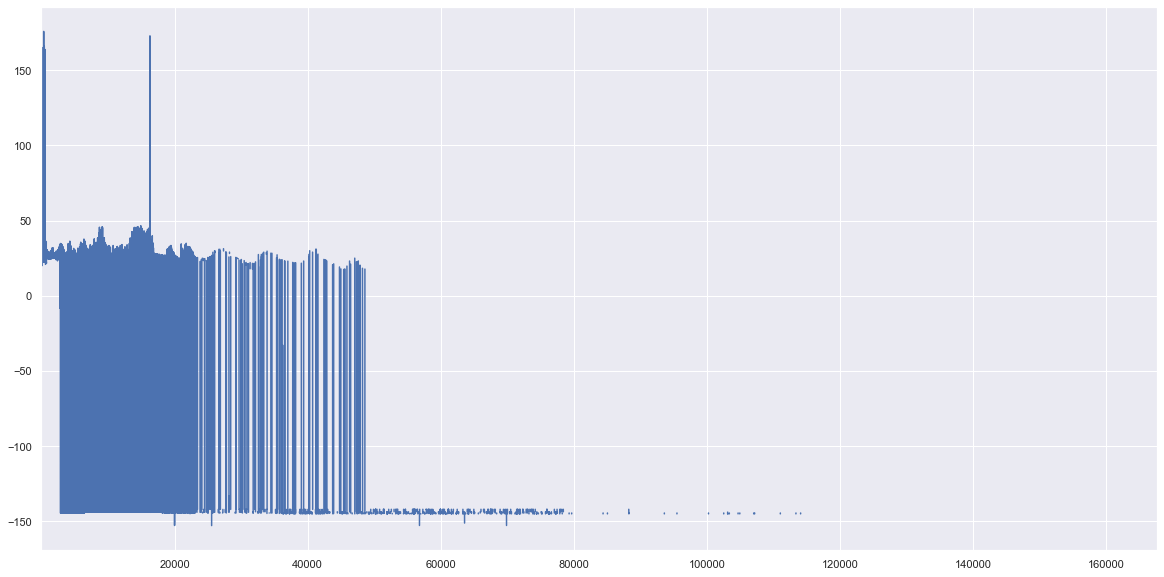

In [199]:
criteria = merged_data.type_id == 'TCA'
plt.figure(figsize=(20,10))
merged_data[criteria]['value'].plot()

** Using Pandas to plot all the temperature sensors on one single plot. **

Use pandas to loop over each temperature sensor, and plot them one at a time.
Hint: Group by sensor_ids and hence plot each group per time.

In [200]:
groupy_type = merged_data.groupby('type_id')
temp_sensor = groupy_type.get_group('TCA')

In [201]:
len(temp_sensor)

28037

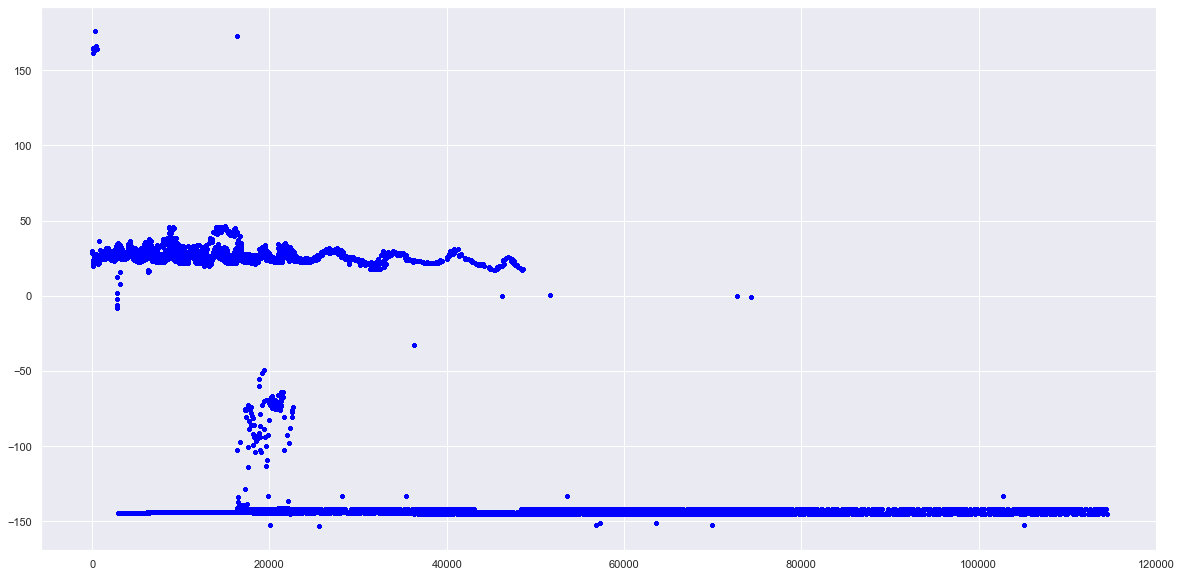

In [202]:
# Plot all sensor with TCA on one graph
plt.figure(figsize=(20,10))
for s in temp_sensor:
    plt.plot(temp_sensor.index, temp_sensor['value'], '.', color="blue")

This plot is fine, but all the lines are too close together. We cannot see how each sensor is behaving. For that, we can try drawing "Subplots." In these plots, each sensor gets its own plot (called a 'panel').

**Task: Creating Subplots - Each sensor gets its own panel**                                                           
Question: Based on the plots being made, comment on the readings made by the temperature sensors.

In [203]:
temp_sensor['sensor_id'].nunique()

10

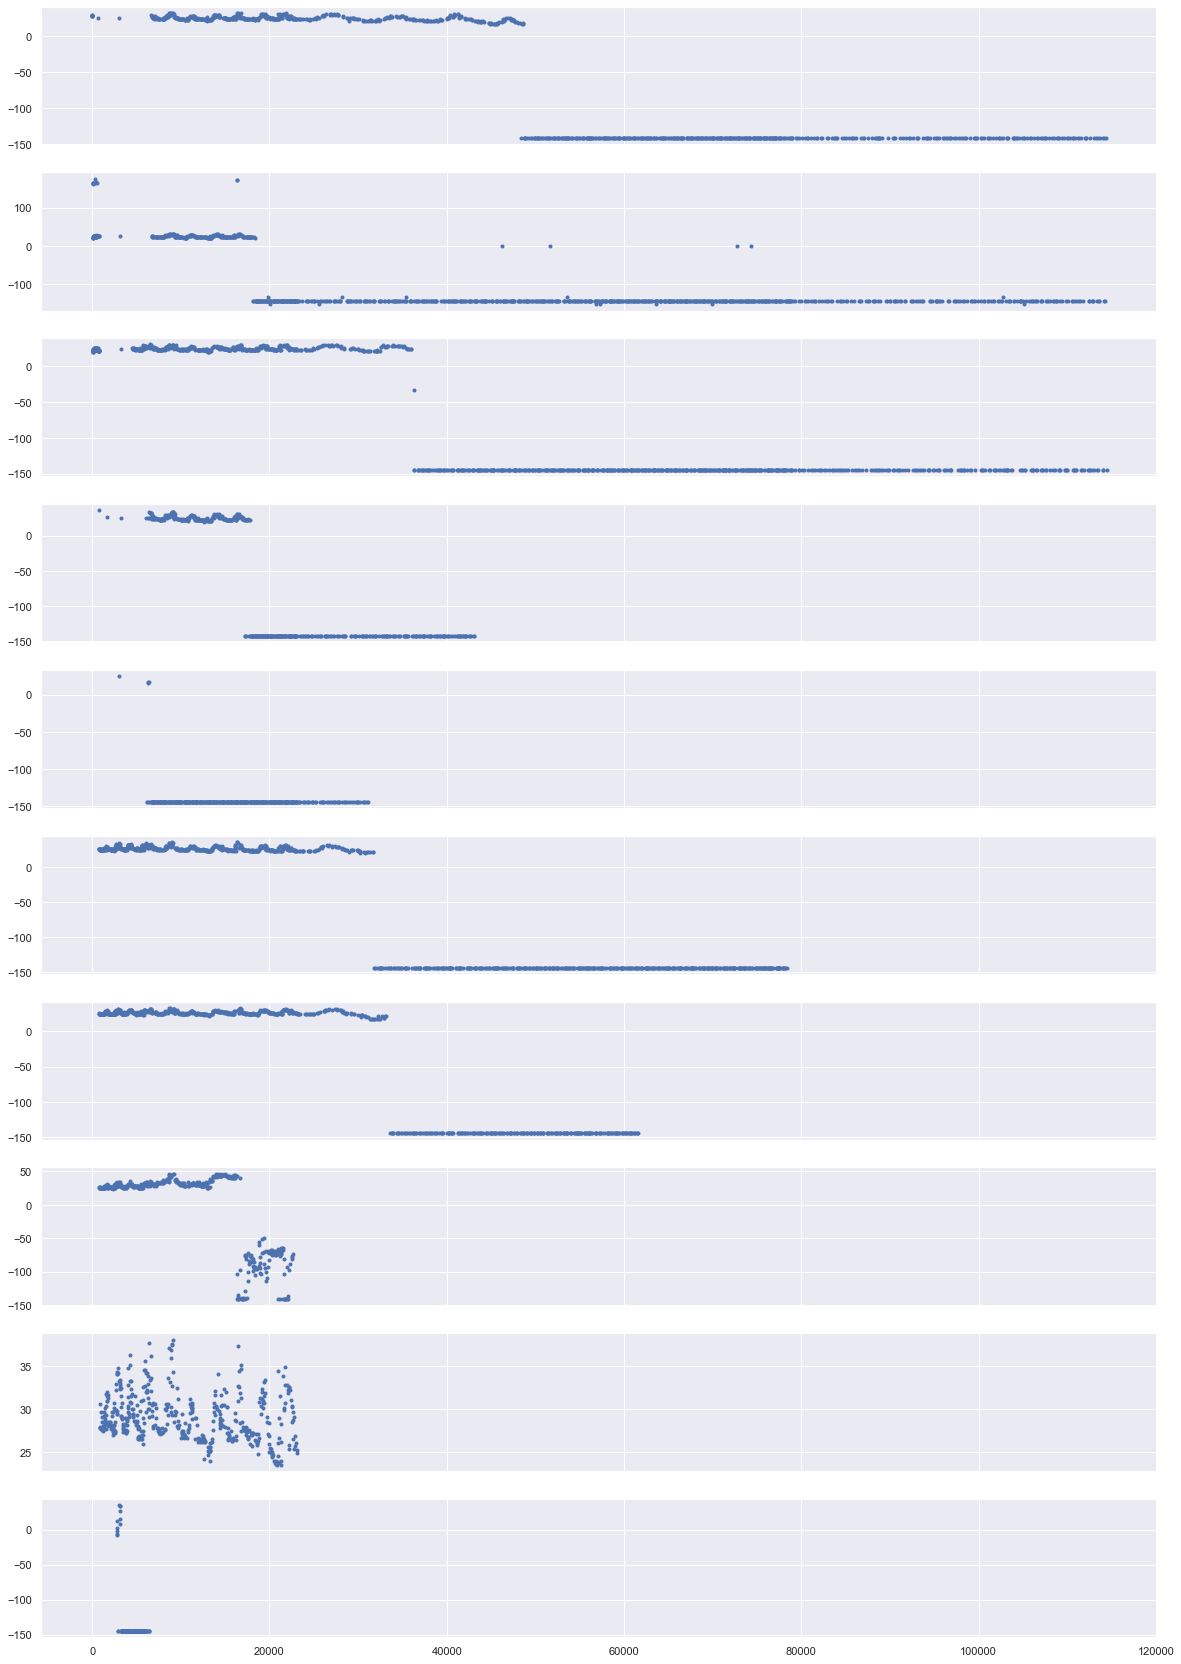

In [209]:
distinct_keys = temp_sensor['sensor_id'].unique()
fig, axes = plt.subplots(len(distinct_keys), 1, sharex=True, figsize=(20,20))
fig.set_size_inches(20,30) 

for i, s in enumerate(distinct_keys):
    df_subset = temp_sensor[temp_sensor['sensor_id']==s]
    axes[i].plot(df_subset.index, df_subset['value'], '.')

The temperature sensor data were at a maximum of 40 degrees and minimum of -150 degrees

**Task: Clean Up Sensor Data**

## Task: Creating a reshaped Data Frame of Temperature sensors

For this, we are going to have each column be 1 sensor... from 1 to 10. The rows will be timestamps, as before.

Hint: pd.pivot() is perfect for this task.

In [205]:
temp_sensors = [s for s in merged_data[merged_data.type_id =='TCA']['sensor_id']]
temp_df = merged_data_drop[merged_data_drop['sensor_id'].isin(temp_sensors)]

#del temp_df['timestamp']
temp_df = temp_df.reset_index()
temp_df.pivot(columns='sensor_id', values='value')

temp_df

index  value                 timestamp  \
0           2  29.30 2016-08-03 04:39:25+00:00   
1           6  29.94 2016-08-03 04:47:41+00:00   
2          15  28.61 2016-08-03 05:08:52+00:00   
3          22  28.24 2016-08-03 05:14:08+00:00   
4          27  28.57 2016-08-03 05:28:55+00:00   
...       ...    ...                       ...   
28032  167699    NaN 2016-10-06 06:59:52+00:00   
28033  167704    NaN 2016-10-06 07:25:56+00:00   
28034  167707    NaN 2016-10-06 07:08:04+00:00   
28035  167710    NaN 2016-10-06 07:32:51+00:00   
28036  167714    NaN 2016-10-06 07:20:18+00:00   

                                  sensor_id  Day  Month  Year      Time  \
0      763ca6f0-8679-11e6-a353-2f6c041e2491    3      8  2016  04:39:25   
1      763ca6f0-8679-11e6-a353-2f6c041e2491    3      8  2016  04:47:41   
2      763ca6f0-8679-11e6-a353-2f6c041e2491    3      8  2016  05:08:52   
3      763ca6f0-8679-11e6-a353-2f6c041e2491    3      8  2016  05:14:08   
4      763ca6f0-8679-11e6-a353-2f6c041e2491    3      8  2016  05:28:55   
...                                     ...  ...    ...   ...       ...   
28032  763bbc90-8679-11e6-a353-2f6c041e2491    6     10  2016  06:59:52   
28033  d3cf6cd0-8679-11e6-a353-2f6c041e2491    6     10  2016  07:25:56   
28034  763bbc90-8679-11e6-a353-2f6c041e2491    6     10  2016  07:08:04   
28035  763bbc90-8679-11e6-a353-2f6c041e2491    6     10  2016  07:32:51   
28036  763bbc90-8679-11e6-a353-2f6c041e2491    6     10  2016  07:20:18   

              type  si_unit type_id  
0      temperature  celcius     TCA  
1      temperature  celcius     TCA  
2      temperature  celcius     TCA  
3      temperature  celcius     TCA  
4      temperature  celcius     TCA  
...            ...      ...     ...  
28032  temperature  celcius     TCA  
28033  temperature  celcius     TCA  
28034  temperature  celcius     TCA  
28035  temperature  celcius     TCA  
28036  temperature  celcius     TCA  

[28037 rows x 11 columns]

Since this is a real sensor data set, there are some time stamps and sensor_id's that are repeating. (Unfortunately, this happens often in real data sets.)

**Task: Find all rows with the same [Timestamp, Sensor_id] and delete them **

**Here's a clever way to find out all the duplicated rows.**

Some Timestamp and sensor_id are repeating. That causes Indexing problems.

In [210]:
pd.concat(g for _, g in temp_df.groupby(['timestamp', 'sensor_id']) if len(g) > 1)

index   value                 timestamp  \
1584     9500   25.64 2016-08-20 20:46:05+00:00   
1599     9599   25.64 2016-08-20 20:46:05+00:00   
1808    10869 -144.12 2016-08-21 08:21:30+00:00   
1819    10914 -144.12 2016-08-21 08:21:30+00:00   
1791    10748 -144.12 2016-08-21 08:51:26+00:00   
...       ...     ...                       ...   
27774  166163     NaN 2016-10-05 16:37:33+00:00   
27991  167458     NaN 2016-10-06 04:25:36+00:00   
27992  167459     NaN 2016-10-06 04:25:36+00:00   
28000  167495     NaN 2016-10-06 04:49:53+00:00   
28005  167507     NaN 2016-10-06 04:49:53+00:00   

                                  sensor_id  Day  Month  Year      Time  \
1584   d3cf6cd0-8679-11e6-a353-2f6c041e2491   20      8  2016  20:46:05   
1599   d3cf6cd0-8679-11e6-a353-2f6c041e2491   20      8  2016  20:46:05   
1808   c15f9391-8679-11e6-a353-2f6c041e2491   21      8  2016  08:21:30   
1819   c15f9391-8679-11e6-a353-2f6c041e2491   21      8  2016  08:21:30   
1791   c15f9391-8679-11e6-a353-2f6c041e2491   21      8  2016  08:51:26   
...                                     ...  ...    ...   ...       ...   
27774  763bbc90-8679-11e6-a353-2f6c041e2491    5     10  2016  16:37:33   
27991  763bbc90-8679-11e6-a353-2f6c041e2491    6     10  2016  04:25:36   
27992  763bbc90-8679-11e6-a353-2f6c041e2491    6     10  2016  04:25:36   
28000  763bbc90-8679-11e6-a353-2f6c041e2491    6     10  2016  04:49:53   
28005  763bbc90-8679-11e6-a353-2f6c041e2491    6     10  2016  04:49:53   

              type  si_unit type_id  
1584   temperature  celcius     TCA  
1599   temperature  celcius     TCA  
1808   temperature  celcius     TCA  
1819   temperature  celcius     TCA  
1791   temperature  celcius     TCA  
...            ...      ...     ...  
27774  temperature  celcius     TCA  
27991  temperature  celcius     TCA  
27992  temperature  celcius     TCA  
28000  temperature  celcius     TCA  
28005  temperature  celcius     TCA  

[1050 rows x 11 columns]

**Task: Drop all the rows where timestamp and sensor_id are duplicated**
**Task: Drop Duplicates**
1. Drop all the rows where timestamp and sensor_id are duplicated
2. Pivot the table
3. Resample the temperature data to daily level.
4. Calculate the mean of the resampled daily data.

In [211]:
tdf = temp_df.drop_duplicates(subset = ['timestamp', 'sensor_id'], keep='first')
# Hint: Look at https://segment.com/blog/5-advanced-testing-techniques-in-go/

In [212]:
temp_df_cor = tdf.pivot(index='timestamp', columns='sensor_id', values='value')
#temp_df_cor

In [213]:
daily_temp_cor_df = temp_df_cor.resample('D').mean()
#daily_temp_cor_df

Now, we are finally ready to calculate the correlations across sensor values. Hint: `Use corr()`

In [223]:
corr_df = daily_temp_cor_df.corr().abs()
corr_df

sensor_id                             763bbc90-8679-11e6-a353-2f6c041e2491  \
sensor_id                                                                    
763bbc90-8679-11e6-a353-2f6c041e2491                              1.000000   
763ca6f0-8679-11e6-a353-2f6c041e2491                              0.604068   
7644bd40-8679-11e6-a353-2f6c041e2491                              0.726736   
c15a6371-8679-11e6-a353-2f6c041e2491                              0.994261   
c15f9391-8679-11e6-a353-2f6c041e2491                              0.308354   
c5e881a1-867a-11e6-a353-2f6c041e2491                              1.000000   
d3cf6cd0-8679-11e6-a353-2f6c041e2491                              0.732838   
d3d53930-8679-11e6-a353-2f6c041e2491                              0.677272   
d3d909c1-8679-11e6-a353-2f6c041e2491                              0.872380   
e6678e91-8679-11e6-a353-2f6c041e2491                              0.652321   

sensor_id                             763ca6f0-8679-11e6-a353-2f6c041e2491  \
sensor_id                                                                    
763bbc90-8679-11e6-a353-2f6c041e2491                              0.604068   
763ca6f0-8679-11e6-a353-2f6c041e2491                              1.000000   
7644bd40-8679-11e6-a353-2f6c041e2491                              0.862264   
c15a6371-8679-11e6-a353-2f6c041e2491                              0.147197   
c15f9391-8679-11e6-a353-2f6c041e2491                              0.360202   
c5e881a1-867a-11e6-a353-2f6c041e2491                              1.000000   
d3cf6cd0-8679-11e6-a353-2f6c041e2491                              0.773070   
d3d53930-8679-11e6-a353-2f6c041e2491                              0.731762   
d3d909c1-8679-11e6-a353-2f6c041e2491                              0.289171   
e6678e91-8679-11e6-a353-2f6c041e2491                              0.066722   

sensor_id                             7644bd40-8679-11e6-a353-2f6c041e2491  \
sensor_id                                                                    
763bbc90-8679-11e6-a353-2f6c041e2491                              0.726736   
763ca6f0-8679-11e6-a353-2f6c041e2491                              0.862264   
7644bd40-8679-11e6-a353-2f6c041e2491                              1.000000   
c15a6371-8679-11e6-a353-2f6c041e2491                              0.415333   
c15f9391-8679-11e6-a353-2f6c041e2491                              0.119104   
c5e881a1-867a-11e6-a353-2f6c041e2491                              0.295498   
d3cf6cd0-8679-11e6-a353-2f6c041e2491                              0.956649   
d3d53930-8679-11e6-a353-2f6c041e2491                              0.976520   
d3d909c1-8679-11e6-a353-2f6c041e2491                              0.129649   
e6678e91-8679-11e6-a353-2f6c041e2491                              0.323607   

sensor_id                             c15a6371-8679-11e6-a353-2f6c041e2491  \
sensor_id                                                                    
763bbc90-8679-11e6-a353-2f6c041e2491                              0.994261   
763ca6f0-8679-11e6-a353-2f6c041e2491                              0.147197   
7644bd40-8679-11e6-a353-2f6c041e2491                              0.415333   
c15a6371-8679-11e6-a353-2f6c041e2491                              1.000000   
c15f9391-8679-11e6-a353-2f6c041e2491                              0.317385   
c5e881a1-867a-11e6-a353-2f6c041e2491                              1.000000   
d3cf6cd0-8679-11e6-a353-2f6c041e2491                              0.534663   
d3d53930-8679-11e6-a353-2f6c041e2491                              0.507379   
d3d909c1-8679-11e6-a353-2f6c041e2491                              0.906632   
e6678e91-8679-11e6-a353-2f6c041e2491                              0.643251   

sensor_id                             c15f9391-8679-11e6-a353-2f6c041e2491  \
sensor_id                                                                    
763bbc90-8679-11e6-a353-2f6c041e2491                              0.308354   
763ca6f0-8679-11e6

In [215]:
# Create a mask to display only the lower triangle of the matrix (since it's mirrored around its 
# top-left to bottom-right diagonal).
mask = np.zeros_like(corr_df)
mask[np.triu_indices_from(mask)] = True


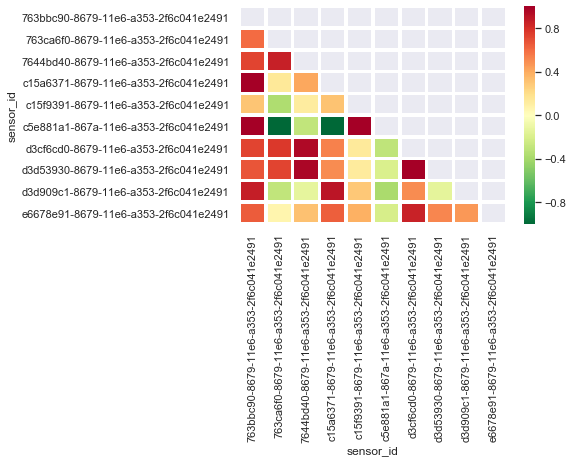

In [216]:
# Create the heatmap using seaborn library. 
# List if colormaps (parameter 'cmap') is available here: http://matplotlib.org/examples/color/colormaps_reference.html
sns.heatmap(corr_df, cmap='RdYlGn_r', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2.5)
 
# Show the plot we reorient the labels for each column and row to make them easier to read.
plt.yticks(rotation=0) 
plt.xticks(rotation=90) 
plt.show()


In [217]:
# All sensor - data, drop all duplicates
full2 = merged_data_drop.drop_duplicates(subset = ['timestamp', 'sensor_id'], keep='first')

In [218]:
# Pivot all data
full_wide = full2.pivot(index='timestamp', columns='sensor_id', values='value')

In [219]:
daily_all_sensors = full_wide.resample('D').mean()

In [220]:
daily_all_sensors

sensor_id                  1248ff60-e707-11e6-89c8-314aa4f67f8c  \
timestamp                                                         
2016-07-01 00:00:00+00:00                            306.902098   
2016-07-02 00:00:00+00:00                            267.804196   
2016-07-03 00:00:00+00:00                            286.972028   
2016-07-04 00:00:00+00:00                            339.860140   
2016-07-05 00:00:00+00:00                            445.828571   
...                                                         ...   
2016-10-02 00:00:00+00:00                                   NaN   
2016-10-03 00:00:00+00:00                                   NaN   
2016-10-04 00:00:00+00:00                                   NaN   
2016-10-05 00:00:00+00:00                                   NaN   
2016-10-06 00:00:00+00:00                                   NaN   

sensor_id                  7635c920-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-07-01 00:00:00+00:00                                   NaN   
2016-07-02 00:00:00+00:00                                   NaN   
2016-07-03 00:00:00+00:00                                   NaN   
2016-07-04 00:00:00+00:00                                   NaN   
2016-07-05 00:00:00+00:00                                   NaN   
...                                                         ...   
2016-10-02 00:00:00+00:00                                   NaN   
2016-10-03 00:00:00+00:00                                   NaN   
2016-10-04 00:00:00+00:00                                   NaN   
2016-10-05 00:00:00+00:00                                   NaN   
2016-10-06 00:00:00+00:00                                   NaN   

sensor_id                  7635f030-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-07-01 00:00:00+00:00                                   NaN   
2016-07-02 00:00:00+00:00                                   NaN   
2016-07-03 00:00:00+00:00                                   NaN   
2016-07-04 00:00:00+00:00                                   NaN   
2016-07-05 00:00:00+00:00                                   NaN   
...                                                         ...   
2016-10-02 00:00:00+00:00                             83.110236   
2016-10-03 00:00:00+00:00                             78.088710   
2016-10-04 00:00:00+00:00                             72.263014   
2016-10-05 00:00:00+00:00                             67.166197   
2016-10-06 00:00:00+00:00                             60.514286   

sensor_id                  7636da90-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-07-01 00:00:00+00:00                                   NaN   
2016-07-02 00:00:00+00:00                                   NaN   
2016-07-03 00:00:00+00:00                                   NaN   
2016-07-04 00:00:00+00:00                                   NaN   
2016-07-05 00:00:00+00:00                                   NaN   
...                                                         ...   
2016-10-02 00:00:00+00:00                                   NaN   
2016-10-03 00:00:00+00:00                                   NaN   
2016-10-04 00:00:00+00:00                                   NaN   
2016-10-05 00:00:00+00:00                                   NaN   
2016-10-06 00:00:00+00:00                                   NaN   

sensor_id                  763701a0-8679-11e6-a353-2f6c041e2491  \
timestamp                                                         
2016-07-01 00:00:00+00:00                                   NaN   
2016-07-02 00:00:00+00:00                                   NaN   
2016-07-03 00:00:00+00:00                                   NaN   
2016-07-04 00:00:00+00:00                                   NaN   
2016-07-05 00:00:00+00:00                                   NaN   
...                                        

**Question:**
Based on the results of the correlation heatmap for temperature sensors, would you recommend working with all temperature sensors or just a subset?

ANSWER: I will recommend removing some of the temperature sensors

**Task: Based on the answer above, remove unnecessary temperature sensors from the data**

In [224]:
# Select upper triangle of correlation matrix
upper = corr_df.where(np.triu(np.ones(corr_df.shape), k=1).astype(np.bool))

In [227]:
# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
to_drop

['c15a6371-8679-11e6-a353-2f6c041e2491',
 'c5e881a1-867a-11e6-a353-2f6c041e2491',
 'd3cf6cd0-8679-11e6-a353-2f6c041e2491',
 'd3d53930-8679-11e6-a353-2f6c041e2491']

In [229]:
temp_final_sensor = corr_df.drop(corr_df[to_drop], axis=1)
temp_final_sensor

sensor_id                             763bbc90-8679-11e6-a353-2f6c041e2491  \
sensor_id                                                                    
763bbc90-8679-11e6-a353-2f6c041e2491                              1.000000   
763ca6f0-8679-11e6-a353-2f6c041e2491                              0.604068   
7644bd40-8679-11e6-a353-2f6c041e2491                              0.726736   
c15a6371-8679-11e6-a353-2f6c041e2491                              0.994261   
c15f9391-8679-11e6-a353-2f6c041e2491                              0.308354   
c5e881a1-867a-11e6-a353-2f6c041e2491                              1.000000   
d3cf6cd0-8679-11e6-a353-2f6c041e2491                              0.732838   
d3d53930-8679-11e6-a353-2f6c041e2491                              0.677272   
d3d909c1-8679-11e6-a353-2f6c041e2491                              0.872380   
e6678e91-8679-11e6-a353-2f6c041e2491                              0.652321   

sensor_id                             763ca6f0-8679-11e6-a353-2f6c041e2491  \
sensor_id                                                                    
763bbc90-8679-11e6-a353-2f6c041e2491                              0.604068   
763ca6f0-8679-11e6-a353-2f6c041e2491                              1.000000   
7644bd40-8679-11e6-a353-2f6c041e2491                              0.862264   
c15a6371-8679-11e6-a353-2f6c041e2491                              0.147197   
c15f9391-8679-11e6-a353-2f6c041e2491                              0.360202   
c5e881a1-867a-11e6-a353-2f6c041e2491                              1.000000   
d3cf6cd0-8679-11e6-a353-2f6c041e2491                              0.773070   
d3d53930-8679-11e6-a353-2f6c041e2491                              0.731762   
d3d909c1-8679-11e6-a353-2f6c041e2491                              0.289171   
e6678e91-8679-11e6-a353-2f6c041e2491                              0.066722   

sensor_id                             7644bd40-8679-11e6-a353-2f6c041e2491  \
sensor_id                                                                    
763bbc90-8679-11e6-a353-2f6c041e2491                              0.726736   
763ca6f0-8679-11e6-a353-2f6c041e2491                              0.862264   
7644bd40-8679-11e6-a353-2f6c041e2491                              1.000000   
c15a6371-8679-11e6-a353-2f6c041e2491                              0.415333   
c15f9391-8679-11e6-a353-2f6c041e2491                              0.119104   
c5e881a1-867a-11e6-a353-2f6c041e2491                              0.295498   
d3cf6cd0-8679-11e6-a353-2f6c041e2491                              0.956649   
d3d53930-8679-11e6-a353-2f6c041e2491                              0.976520   
d3d909c1-8679-11e6-a353-2f6c041e2491                              0.129649   
e6678e91-8679-11e6-a353-2f6c041e2491                              0.323607   

sensor_id                             c15f9391-8679-11e6-a353-2f6c041e2491  \
sensor_id                                                                    
763bbc90-8679-11e6-a353-2f6c041e2491                              0.308354   
763ca6f0-8679-11e6-a353-2f6c041e2491                              0.360202   
7644bd40-8679-11e6-a353-2f6c041e2491                              0.119104   
c15a6371-8679-11e6-a353-2f6c041e2491                              0.317385   
c15f9391-8679-11e6-a353-2f6c041e2491                              1.000000   
c5e881a1-867a-11e6-a353-2f6c041e2491                              1.000000   
d3cf6cd0-8679-11e6-a353-2f6c041e2491                              0.138210   
d3d53930-8679-11e6-a353-2f6c041e2491                              0.131605   
d3d909c1-8679-11e6-a353-2f6c041e2491                              0.289810   
e6678e91-8679-11e6-a353-2f6c041e2491                              0.384183   

sensor_id                             d3d909c1-8679-11e6-a353-2f6c041e2491  \
sensor_id                                                                    
763bbc90-8679-11e6-a353-2f6c041e2491                              0.872380   
763ca6f0-8679-11e6

### Run this method across all sensors to feed into the model

In [130]:

missing= (daily_all_sensors.isnull().sum()/daily_all_sensors.shape[0]*100).sort_values(ascending=False).reset_index()
missing.columns = ["Column Name","Percent Missing"]

In [131]:
pd.concat([missing[:29], missing[29:].reset_index(drop=True)], axis=1)
# Most of the sensor data is missing 

Column Name  Percent Missing  \
0   e66851e1-8679-11e6-a353-2f6c041e2491       100.000000   
1   c5e80c70-867a-11e6-a353-2f6c041e2491        98.979592   
2   763701a1-8679-11e6-a353-2f6c041e2491        97.959184   
3   c15fbaa0-8679-11e6-a353-2f6c041e2491        97.959184   
4   d3cf45c0-8679-11e6-a353-2f6c041e2491        97.959184   
5   d3d909c0-8679-11e6-a353-2f6c041e2491        97.959184   
6   c5e685d0-867a-11e6-a353-2f6c041e2491        96.938776   
7   c5e9ba20-867a-11e6-a353-2f6c041e2491        96.938776   
8   c5e8a8b0-867a-11e6-a353-2f6c041e2491        96.938776   
9   c5e881a1-867a-11e6-a353-2f6c041e2491        96.938776   
10  c5e881a0-867a-11e6-a353-2f6c041e2491        96.938776   
11  d3cea980-8679-11e6-a353-2f6c041e2491        95.918367   
12  c15a6370-8679-11e6-a353-2f6c041e2491        95.918367   
13  d3d3b291-8679-11e6-a353-2f6c041e2491        95.918367   
14  c15fbaa1-8679-11e6-a353-2f6c041e2491        94.897959   
15  76427351-8679-11e6-a353-2f6c041e2491        93.877551   
16  d3d7d140-8679-11e6-a353-2f6c041e2491        92.857143   
17  c162c7e0-8679-11e6-a353-2f6c041e2491        89.795918   
18  c15f9390-8679-11e6-a353-2f6c041e2491        89.795918   
19  c15f9391-8679-11e6-a353-2f6c041e2491        89.795918   
20  d3d909c1-8679-11e6-a353-2f6c041e2491        88.775510   
21  d3db2ca0-8679-11e6-a353-2f6c041e2491        88.775510   
22  d3db53b0-8679-11e6-a353-2f6c041e2491        88.775510   
23  c15ef750-8679-11e6-a353-2f6c041e2491        88.775510   
24  e6691530-8679-11e6-a353-2f6c041e2491        87.755102   
25  e6678e91-8679-11e6-a353-2f6c041e2491        87.755102   
26  e66851e0-8679-11e6-a353-2f6c041e2491        87.755102   
27  e6678e90-8679-11e6-a353-2f6c041e2491        87.755102   
28  c159c730-8679-11e6-a353-2f6c041e2491        86.734694   
29                                   NaN              NaN   
30                                   NaN              NaN   
31                                   NaN              NaN   

                             Column Name  Percent Missing  
0   c15c5f40-8679-11e6-a353-2f6c041e2491        86.734694  
1   c159ee40-8679-11e6-a353-2f6c041e2491        86.734694  
2   c15a6371-8679-11e6-a353-2f6c041e2491        86.734694  
3   c15a6372-8679-11e6-a353-2f6c041e2491        86.734694  
4   d3d698c0-8679-11e6-a353-2f6c041e2491        81.632653  
5   d3d56040-8679-11e6-a353-2f6c041e2491        81.632653  
6   d3d53930-8679-11e6-a353-2f6c041e2491        81.632653  
7   d3d3b290-8679-11e6-a353-2f6c041e2491        81.632653  
8   d3d168a0-8679-11e6-a353-2f6c041e2491        78.571429  
9   d3cf6cd0-8679-11e6-a353-2f6c041e2491        78.571429  
10  d3d0cc60-8679-11e6-a353-2f6c041e2491        78.571429  
11  d3d73500-8679-11e6-a353-2f6c041e2491        77.551020  
12  763d9150-8679-11e6-a353-2f6c041e2491        76.530612  
13  7635c920-8679-11e6-a353-2f6c041e2491        76.530612  
14  763b9580-8679-11e6-a353-2f6c041e2491        76.530612  
15  763ca6f0-8679-11e6-a353-2f6c041e2491        76.530612  
16  764161e0-8679-11e6-a353-2f6c041e2491        76.530612  
17  763701a0-8679-11e6-a353-2f6c041e2491        75.510204  
18  763bbc90-8679-11e6-a353-2f6c041e2491        75.510204  
19  763d6a40-8679-11e6-a353-2f6c041e2491        75.510204  
20  7636da90-8679-11e6-a353-2f6c041e2491        75.510204  
21  76402960-8679-11e6-a353-2f6c041e2491        75.510204  
22  e66592c0-8679-11e6-a353-2f6c041e2491        75.510204  
23  76427350-8679-11e6-a353-2f6c041e2491        73.469388  
24  7644bd40-8679-11e6-a353-2f6c041e2491        73.469388  
25  7645ceb1-8679-11e6-a353-2f6c041e2491        73.469388  
26  7645ceb0-8679-11e6-a353-2f6c041e2491        73.469388  
27  76413ad0-8679-11e6-a353-2f6c041e2491        72.448980  
28  7635f030-8679-11e6-a353-2f6c041e2491        64.285714  
29  d3cd7100-8679-11e6-a353-2f6c041e2491        64.285714  
30  d3d33d60-8679-11e6-a353-2f6c041e2491        64.285714  
31  1248ff60-e707-11e6-89c8-314aa4f67f8c        36.734694

**Trying to building a Linear Model**

In order to do that, we first need to create a data frame with the columns representing only those sensors for ONE NODE.

Try to see if pd.pivot() can help with grouping Nodes together

In [132]:
nodes.name # so we have 10 "nodes" with 6 sensors each. [T, Pr, HUMA, PPM , PPM2, BATT]

0       N1
1       N9
2       N8
3      N10
4       N2
5       N3
6       N7
7       N4
8       N5
9     RSAM
10      N6
Name: name, dtype: object

In [133]:
fullnode = pd.merge(merged_data, nodes, left_on='node_id', right_on='id')

In [134]:
fullnode.columns, fullnode.index

(Index(['id_x', 'value', 'timestamp', 'sensor_id', 'Day', 'Month', 'Year',
        'Time', 'type', 'si_unit', 'type_id', 'description_x', 'data_frequency',
        'status_x', 'created_at_x', 'updated_at_x', 'data_type_id', 'node_id',
        'id_y', 'name', 'description_y', 'location', 'status_y', 'created_at_y',
        'updated_at_y', 'volcano_id'],
       dtype='object'),
 Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                  8,      9,
             ...
             176524, 176525, 176526, 176527, 176528, 176529, 176530, 176531,
             176532, 176533],
            dtype='int64', length=176534))

In [135]:
fullnode.set_index('timestamp', inplace=True)

In [136]:
fullnode.resample('D').mean()

value  Day  Month    Year  data_frequency
timestamp                                                                
2016-07-01 00:00:00+00:00  306.902098  1.0    7.0  2016.0       1800000.0
2016-07-02 00:00:00+00:00  267.804196  2.0    7.0  2016.0       1800000.0
2016-07-03 00:00:00+00:00  286.972028  3.0    7.0  2016.0       1800000.0
2016-07-04 00:00:00+00:00  339.860140  4.0    7.0  2016.0       1800000.0
2016-07-05 00:00:00+00:00  445.828571  5.0    7.0  2016.0       1800000.0
...                               ...  ...    ...     ...             ...
2016-10-02 00:00:00+00:00   84.783231  2.0   10.0  2016.0       1800000.0
2016-10-03 00:00:00+00:00   79.059548  3.0   10.0  2016.0       1800000.0
2016-10-04 00:00:00+00:00   77.155172  4.0   10.0  2016.0       1800000.0
2016-10-05 00:00:00+00:00   73.356674  5.0   10.0  2016.0       1800000.0
2016-10-06 00:00:00+00:00   68.235294  6.0   10.0  2016.0       1800000.0

[98 rows x 5 columns]

In [137]:
# fullnode.pivot_table(index=['timestamp', 'name'], columns='type', values='value')
fn_wide = fullnode.pivot_table(index=['timestamp','name'], columns=['type'], values='value')


In [138]:
#Now, let's make the Node ('name') into its own column. We do this by reset_index() for that level (=1)
fn_wide.reset_index(level=1, inplace=True)

In [139]:
fn_wide.head()

type                       name   RSAM  battery  carbon dioxide concentration  \
timestamp                                                                       
2016-07-01 00:00:31+00:00  RSAM  455.0      NaN                           NaN   
2016-07-01 00:10:02+00:00  RSAM  213.0      NaN                           NaN   
2016-07-01 00:20:00+00:00  RSAM  225.0      NaN                           NaN   
2016-07-01 00:30:01+00:00  RSAM  321.0      NaN                           NaN   
2016-07-01 00:40:00+00:00  RSAM  429.0      NaN                           NaN   

type                       humidity  hydrogen sulfide concentration  pressure  \
timestamp                                                                       
2016-07-01 00:00:31+00:00       NaN                             NaN       NaN   
2016-07-01 00:10:02+00:00       NaN                             NaN       NaN   
2016-07-01 00:20:00+00:00       NaN                             NaN       NaN   
2016-07-01 00:30:01+00:00       NaN                             NaN       NaN   
2016-07-01 00:40:00+00:00       NaN                             NaN       NaN   

type                       temperature  
timestamp                               
2016-07-01 00:00:31+00:00          NaN  
2016-07-01 00:10:02+00:00          NaN  
2016-07-01 00:20:00+00:00          NaN  
2016-07-01 00:30:01+00:00          NaN  
2016-07-01 00:40:00+00:00          NaN

Before we can perform Linear Regression, we have one last step remaining. We'd like to "resample" all the data, aggregating it down to 'Daily' Levels.

In [140]:
lmfn = fn_wide.resample('D').mean()
lmfn = lmfn.fillna(lmfn.mean())

In [141]:
lmfn

type                             RSAM    battery  \
timestamp                                          
2016-07-01 00:00:00+00:00  306.902098  75.430055   
2016-07-02 00:00:00+00:00  267.804196  75.430055   
2016-07-03 00:00:00+00:00  286.972028  75.430055   
2016-07-04 00:00:00+00:00  339.860140  75.430055   
2016-07-05 00:00:00+00:00  445.828571  75.430055   
...                               ...        ...   
2016-10-02 00:00:00+00:00  261.939330  84.808642   
2016-10-03 00:00:00+00:00  261.939330  79.055556   
2016-10-04 00:00:00+00:00  261.939330  77.174946   
2016-10-05 00:00:00+00:00  261.939330  73.323789   
2016-10-06 00:00:00+00:00  261.939330  68.311111   

type                       carbon dioxide concentration   humidity  \
timestamp                                                            
2016-07-01 00:00:00+00:00                     346.82341  58.820877   
2016-07-02 00:00:00+00:00                     346.82341  58.820877   
2016-07-03 00:00:00+00:00                     346.82341  58.820877   
2016-07-04 00:00:00+00:00                     346.82341  58.820877   
2016-07-05 00:00:00+00:00                     346.82341  58.820877   
...                                                 ...        ...   
2016-10-02 00:00:00+00:00                     346.82341  58.820877   
2016-10-03 00:00:00+00:00                     346.82341  58.820877   
2016-10-04 00:00:00+00:00                     346.82341  58.820877   
2016-10-05 00:00:00+00:00                     346.82341  58.820877   
2016-10-06 00:00:00+00:00                     346.82341  58.820877   

type                       hydrogen sulfide concentration      pressure  \
timestamp                                                                 
2016-07-01 00:00:00+00:00                       29.616125  1.255737e+06   
2016-07-02 00:00:00+00:00                       29.616125  1.255737e+06   
2016-07-03 00:00:00+00:00                       29.616125  1.255737e+06   
2016-07-04 00:00:00+00:00                       29.616125  1.255737e+06   
2016-07-05 00:00:00+00:00                       29.616125  1.255737e+06   
...                                                   ...           ...   
2016-10-02 00:00:00+00:00                       29.616125  1.255737e+06   
2016-10-03 00:00:00+00:00                       29.616125  1.255737e+06   
2016-10-04 00:00:00+00:00                       29.616125  1.255737e+06   
2016-10-05 00:00:00+00:00                       29.616125  1.255737e+06   
2016-10-06 00:00:00+00:00                       29.616125  1.255737e+06   

type                       temperature  
timestamp                               
2016-07-01 00:00:00+00:00   -48.848781  
2016-07-02 00:00:00+00:00   -48.848781  
2016-07-03 00:00:00+00:00   -48.848781  
2016-07-04 00:00:00+00:00   -48.848781  
2016-07-05 00:00:00+00:00   -48.848781  
...                                ...  
2016-10-02 00:00:00+00:00   -48.848781  
2016-10-03 00:00:00+00:00   -48.848781  
2016-10-04 00:00:00+00:00   -48.848781  
2016-10-05 00:00:00+00:00   -48.848781  
2016-10-06 00:00:00+00:00   -48.848781  

[98 rows x 7 columns]

In [142]:
lmfn.shape

(98, 7)

### End of Stitching. 

**The Digital Thread for this dataset has been created**

This "digital Thread" has been used to 'stitch' the data frame with all the values we wish to analyze.

---
Now we finally have the data frame in the shape we wanted to enable Linear Regression.

### 8.0 Sample Modeling

**8.1 Building A Battery Remaining-Life prediction model **
Build a machine learning model (LR, tree-based or any other) to try and predict the Battery life (remaining) as a function of any of the other sensor characteristic.

* Which variable (sensor) is a good predictor of battery life?
* Is your linear regression a "good fit?"
* What it the RMSE of your predicted values?

#### Baseline Model

In [143]:
#==============================================================================
# Supervised learning linear regression
#==============================================================================

from sklearn import linear_model
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve, f1_score
from sklearn.model_selection import cross_val_score, GridSearchCV
# Split the data into training/testing sets
#train = lmfn[:-30]
#test = lmfn[-30:]

In [144]:
X = lmfn.drop(['battery'], axis = 1).values # X are the input (or independent) variables
y = lmfn['battery'].values # Y is output (or dependent) variable

In [145]:
lmfn.columns

Index(['RSAM', 'battery', 'carbon dioxide concentration', 'humidity',
       'hydrogen sulfide concentration', 'pressure', 'temperature'],
      dtype='object', name='type')

In [146]:
X = StandardScaler().fit_transform(X)

In [147]:
#Train Test split 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.20, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((78, 6), (20, 6), (78,), (20,))

In [148]:
#train.columns

In [149]:
# target, predictors = 'battery', 'temperature'

# x_train=train[predictors].to_frame() #converts the pandas Series to numpy.ndarray
# y_train=train[target].to_frame()
# x_test=test[predictors].to_frame() #converts the pandas Series to numpy.ndarray
# y_test=test[target].to_frame()

In [150]:
# 2.- Create linear regression object
regr = linear_model.LinearRegression()

# 3.- Train the model using the training sets
regr.fit(X_train,y_train)

LinearRegression()

In [151]:
predictions = regr.predict(X_test)
print(predictions[0:5]),print(y_test[0:5])

[49.4011569  73.09391845 75.51247465 77.25537001 75.51247465]
[49.54116223 96.         79.05555556 75.43005484 75.43005484]


(None, None)

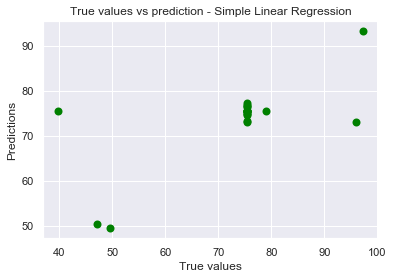

In [152]:
#To make predictions on the test data
plt.title('True values vs prediction - Simple Linear Regression')
plt.scatter(y_test, predictions, color="green", linewidth=2)
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.show()

In [153]:
print("Score:", regr.score(X_test, y_test))

Score: 0.47750079157358316


In [154]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 4.066642999387575
Mean Squared Error: 92.73194126391965
Root Mean Squared Error: 9.629742533625686


#### Random Forest Regression

In [157]:
from sklearn.ensemble import RandomForestRegressor

In [158]:
model = RandomForestRegressor(n_estimators=11,random_state=0,max_depth=30,n_jobs=-1)    #ensemble method
#model.fit(X_train, y_train)

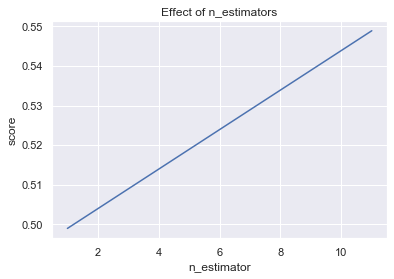

In [159]:
# Try different numbers of n_estimators or trees 
estimators = np.arange(1, 20, 10)
scores = []
for n in estimators:
    model.set_params(n_estimators=n)
    model.fit(X_train, y_train)
    scores.append(model.score(X_test, y_test))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [160]:
y_predicted = model.predict(X_test)

In [161]:
labels = ['RSAM', 'temperature', 'carbon dioxide concentration', 'humidity',
       'hydrogen sulfide concentration', 'pressure']; labels

['RSAM',
 'temperature',
 'carbon dioxide concentration',
 'humidity',
 'hydrogen sulfide concentration',
 'pressure']

In [162]:
result = pd.DataFrame()
result['feature'] = labels
result['importance'] = model.feature_importances_
result.sort_values(by=['importance'], ascending=False, inplace=True)
result

feature  importance
5                        pressure    0.773851
2    carbon dioxide concentration    0.110320
3                        humidity    0.047078
0                            RSAM    0.028552
1                     temperature    0.022557
4  hydrogen sulfide concentration    0.017642

In [163]:
from sklearn.metrics import r2_score
score = r2_score(y_test, y_predicted)
print('Score:',score)

Score: 0.5489061728957265


In [164]:
#MSE, MAE
# Evaluating the Algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_predicted))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_predicted))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

Mean Absolute Error: 4.4383620300685696
Mean Squared Error: 80.05908067407383
Root Mean Squared Error: 8.947574010539048


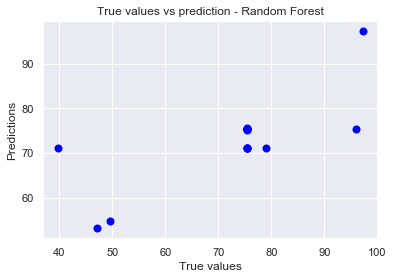

In [165]:
plt.title('True values vs prediction - Random Forest')
plt.scatter(y_test, y_predicted, color="blue", linewidth=2)
plt.xlabel("True values")
plt.ylabel("Predictions")
plt.show()